# <b>Differential Gene Expression Analysis</b>
## Using DeSEQ2 with biological replicates

In [1]:
import custom_functions_pydeseqEnv as cf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import scanpy as sc
import seaborn as sns
import warnings
from custom_functions_pydeseqEnv import plot_volcano_df, plot_volcano_df_html, return_de
from matplotlib.pyplot import rc_context

In [2]:
# Set the seed
np.random.seed(123)

#warnings.filterwarnings("ignore")

## Loading the data

In [3]:
adata = sc.read_h5ad("../data/taPVAT_8W_24W_M_F_HF_CTRL_combined_preprocessed.h5ad")

In [4]:
annotate = sc.read_h5ad('../data/taPVAT_combined_annotated_with_immune_fibro_ecs.h5ad')

In [5]:
### We'll normalize and log transform the data in adata here
### Deseq will take in data from the "counts" layer which is unnormalized.
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata

In [6]:
### Then we add annotations, clusters, and UMAP coordinates
adata.obs['celltype'] = annotate.obs.celltype.copy() 
adata.obs['celltype_broad'] = annotate.obs.celltype_broad.copy() 
adata.obs['leiden'] = annotate.obs.leiden.copy()
adata.obsm['X_umap'] = annotate.obsm['X_umap'].copy()

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


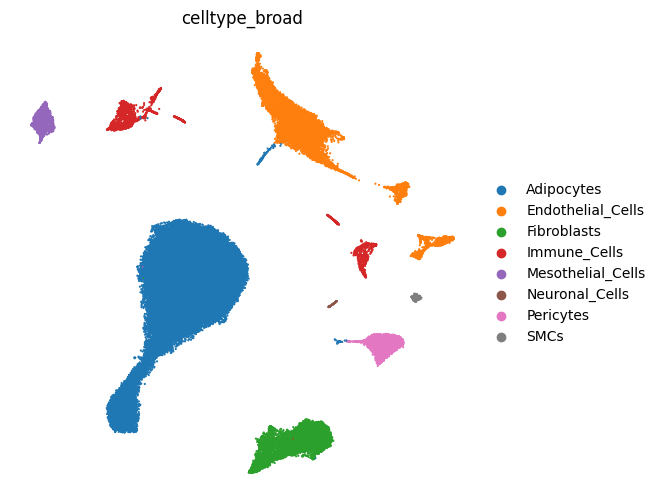

In [7]:
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.umap(adata, color = ['celltype_broad'], frameon = False, s = 10)

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


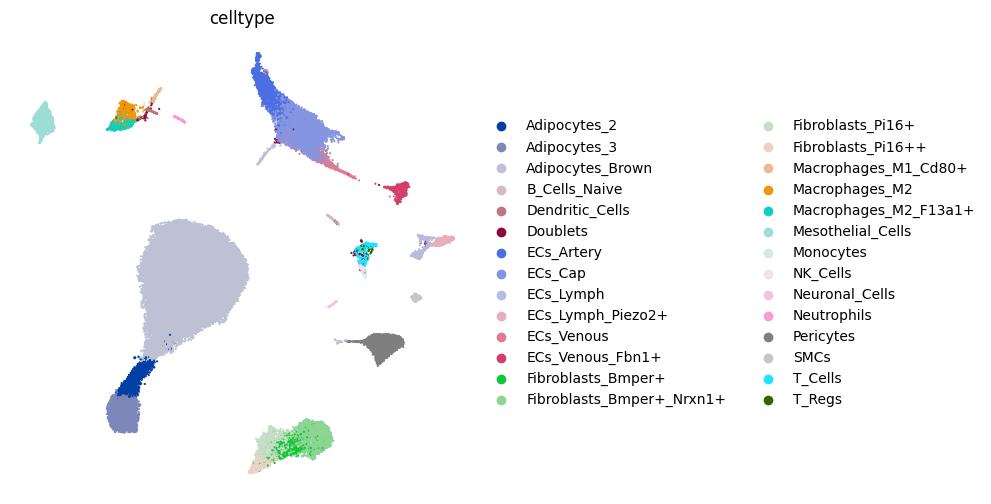

In [8]:
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.umap(adata, color = ['celltype'], frameon = False, s = 10)

## Using DESeq across high-level comparisons

Comparing across diet in taPVAT whole_tissue


Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 10.53 seconds.

Fitting dispersion trend curve...
... done in 6.42 seconds.

Fitting MAP dispersions...
... done in 13.41 seconds.

Fitting LFCs...
... done in 6.76 seconds.

Refitting 31 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.04 seconds.

Fitting LFCs...
... done in 0.03 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


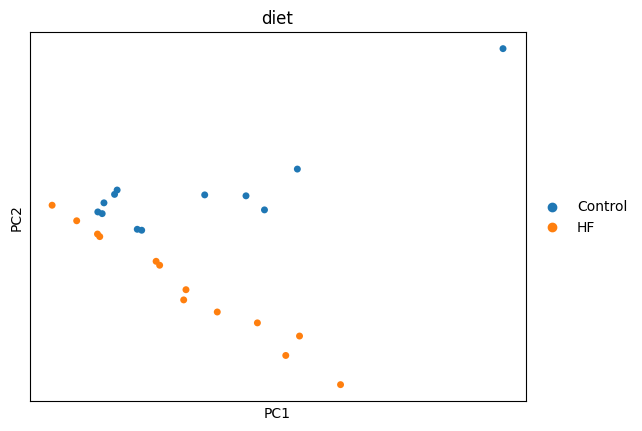

Running Wald tests...
... done in 8.08 seconds.



Log2 fold change & Wald test p-value: diet HF vs Control


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1700066B19Rik,0.259076,-1.034793,2.064518,-0.501228,0.616211,NaN
3110082J24Rik,32.333176,0.266064,0.368619,0.721786,0.470426,0.721339
4930404H24Rik,0.323128,-0.615542,1.298288,-0.474118,0.635416,NaN
4930455H04Rik,4.395147,0.037227,0.380655,0.097796,0.922094,0.973323
4933400A11Rik,0.657848,-0.292226,0.944307,-0.309461,0.756971,NaN
...,...,...,...,...,...,...
hist1h2ail2,7.107155,-0.323677,0.350721,-0.922891,0.356064,0.628652
mrpl11,243.000627,-0.004881,0.109072,-0.044752,0.964305,0.987904
mrpl24,332.081398,-0.273518,0.091884,-2.976792,0.002913,0.028758
mrpl9,95.040702,-0.076703,0.112542,-0.681544,0.495527,0.739007


/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de['padj'] = de['padj'].iloc[:] + 1e-199


files saved to: ../output/DEGs/taPVAT_whole_tissue_HF_vs_Control_diet_comparison....


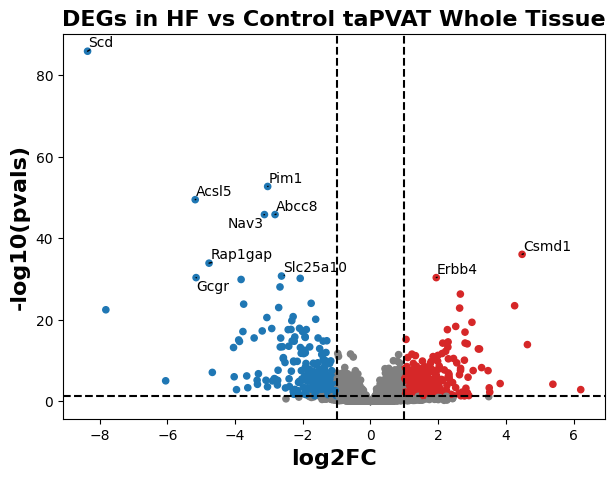

Comparing across time in taPVAT whole_tissue


Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 10.31 seconds.

Fitting dispersion trend curve...
... done in 6.33 seconds.

Fitting MAP dispersions...
... done in 13.35 seconds.

Fitting LFCs...
... done in 6.58 seconds.

Refitting 33 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting LFCs...
... done in 0.03 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



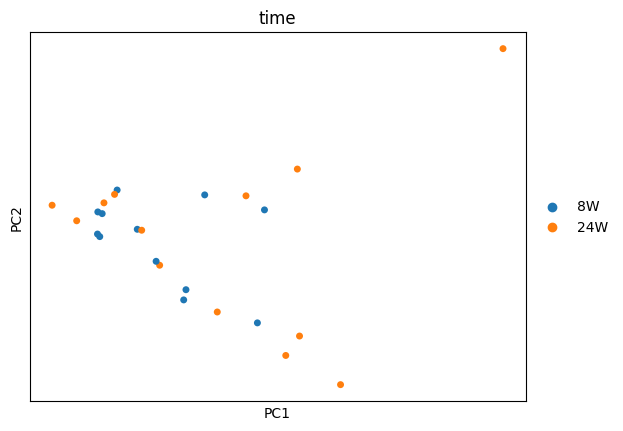

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 8.08 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1700066B19Rik,0.259076,-3.000414,2.155493,-1.391985,0.163927,NaN
3110082J24Rik,32.333176,-0.656785,0.353111,-1.859995,0.062886,0.205800
4930404H24Rik,0.323128,1.680394,1.394123,1.205342,0.228071,NaN
4930455H04Rik,4.395147,0.267789,0.376665,0.710947,0.477117,0.689161
4933400A11Rik,0.657848,0.544637,0.967283,0.563059,0.573395,NaN
...,...,...,...,...,...,...
hist1h2ail2,7.107155,-1.035876,0.304523,-3.401631,0.000670,0.009093
mrpl11,243.000627,0.080821,0.108655,0.743832,0.456978,0.672617
mrpl24,332.081398,0.032812,0.108400,0.302698,0.762120,0.885149
mrpl9,95.040702,-0.323518,0.090703,-3.566772,0.000361,0.005898


/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_whole_tissue_24W_vs_8W_time_comparison....


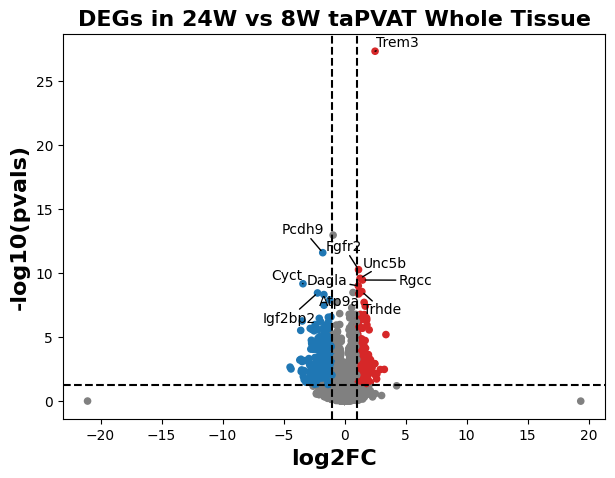

Comparing across sex in taPVAT whole_tissue


Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 10.29 seconds.

Fitting dispersion trend curve...
... done in 6.32 seconds.

Fitting MAP dispersions...
... done in 13.51 seconds.

Fitting LFCs...
... done in 6.58 seconds.

Refitting 34 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.04 seconds.

Fitting LFCs...
... done in 0.03 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



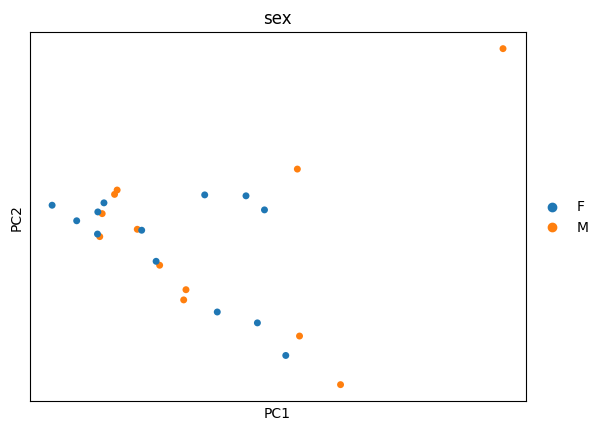

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 8.23 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1700066B19Rik,0.259076,0.761802,2.058205,0.370129,0.711286,NaN
3110082J24Rik,32.333176,0.802014,0.339868,2.359778,0.018286,0.180533
4930404H24Rik,0.323128,1.970656,1.338294,1.472513,0.140882,NaN
4930455H04Rik,4.395147,-0.717209,0.353703,-2.027715,0.042589,0.271625
4933400A11Rik,0.657848,-0.716696,0.957359,-0.748618,0.454088,NaN
...,...,...,...,...,...,...
hist1h2ail2,7.107155,0.311328,0.352417,0.883408,0.377016,0.711313
mrpl11,243.000627,0.060259,0.107213,0.562053,0.574080,0.831453
mrpl24,332.081398,0.051387,0.108287,0.474540,0.635115,0.861840
mrpl9,95.040702,-0.005282,0.113924,-0.046360,0.963023,0.987531


/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_whole_tissue_F_vs_M_sex_comparison....


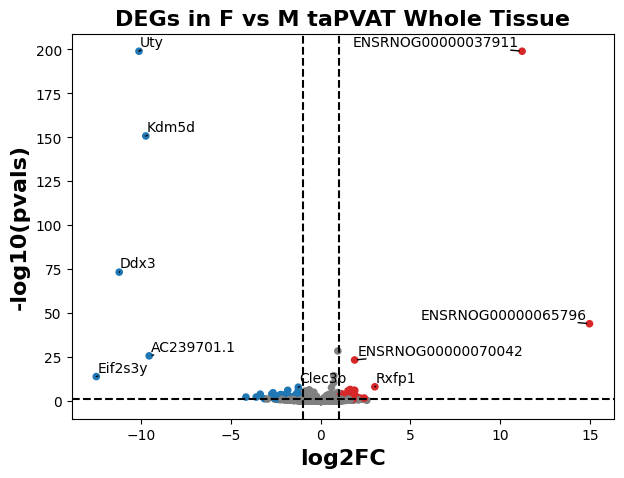

CPU times: user 10min 54s, sys: 47 s, total: 11min 41s
Wall time: 13min 25s


In [9]:
%%time
### High level comparisons across whole-tissue
deseqRes = []

celltype = 'whole_tissue'
group_list = ['diet', 'time', 'sex']
group1_list = ['Control', '8W', 'M']
group2_list = ['HF', '24W', 'F']

for i in range(len(group_list)):
    print(f'Comparing across {group_list[i]} in taPVAT {celltype}')
    
    adata_subset = adata.copy()
    celltype = celltype
    group = group_list[i]
    group1 = group1_list[i] 
    group2 = group2_list[i]
    
    ### Get the counts of cells per sample and check if any are less than 3
    sample_counts = adata_subset.obs['sample_id'].value_counts()
    failing_samples = sample_counts[sample_counts < 3]

    ### Check if there are any failing samples before moving on to DEG analysis
    if not failing_samples.empty:
        print("There are less than 3 cells of this cell type in the following samples:")
        print(failing_samples)
        deseqRes
    else:
        ### Run DESeq and save results
        de = return_de(adata, celltype, group, group1, group2)
        de['subset'] = 'None'
        de['sub_id'] = 'None'
        de['sub_2'] = 'None'
        de['sub_id_2'] = 'None'
        de['level'] = 'high'
        deseqRes.append(de)

        ### Generate and save volcano plots
        plot_volcano_df(de, celltype, group, group1, group2, return_fig = False, save = False)
        plot_volcano_df_html(de, celltype, group, group1, group2, return_fig = False, save = False)
        plt.show()

deseqResults1 = pd.concat(deseqRes)
deseqResults1.to_csv('../output/DEGs/taPVAT_whole_tissue_high_level_deseq_all_genes_all.txt', sep = '\t')

Comparing across diet in taPVAT Fibroblasts
There are less than 12 cells of this cell type in the following samples:
sample_id
P_HF_24W_F_01    1
Name: count, dtype: int64
Comparing across diet in taPVAT Adipocytes


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 9.58 seconds.

Fitting dispersion trend curve...
... done in 6.06 seconds.

Fitting MAP dispersions...
... done in 12.38 seconds.

Fitting LFCs...
... done in 6.29 seconds.

Refitting 48 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.19 seconds.

Fitting MAP dispersions...
... done in 0.06 seconds.

Fitting LFCs...
... done in 0.04 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



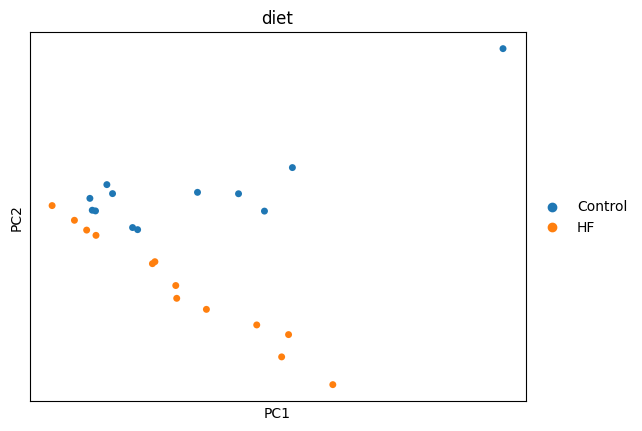

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 8.16 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
3110082J24Rik,31.829409,0.158600,0.378698,0.418803,6.753602e-01,0.827127
4930404H24Rik,0.355915,-0.767200,1.307884,-0.586596,5.574749e-01,NaN
4930455H04Rik,3.198805,0.265129,0.485186,0.546449,5.847574e-01,0.767468
6330411D24Rik,4.262944,0.999922,0.665390,1.502762,1.329005e-01,0.323154
A1cf,0.922657,1.381439,0.982206,1.406466,1.595858e-01,0.361236
...,...,...,...,...,...,...
hist1h2ail2,2.955139,-0.760580,0.502048,-1.514954,1.297839e-01,0.317629
mrpl11,221.660670,-0.089441,0.080524,-1.110734,2.666828e-01,0.494914
mrpl24,295.321602,-0.349534,0.069474,-5.031177,4.874775e-07,0.000014
mrpl9,71.582780,-0.173354,0.136771,-1.267476,2.049850e-01,0.423199


/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Adipocytes_HF_vs_Control_diet_comparison....


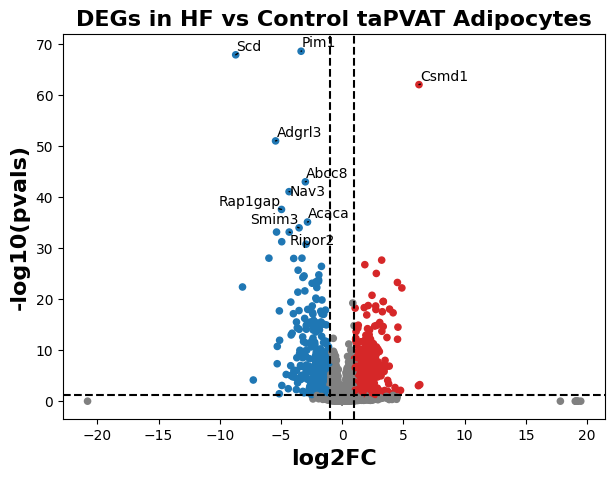

Comparing across diet in taPVAT Immune_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 7.37 seconds.

Fitting dispersion trend curve...
... done in 4.54 seconds.

Fitting MAP dispersions...
... done in 8.31 seconds.

Fitting LFCs...
... done in 5.13 seconds.

Refitting 29 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting LFCs...
... done in 0.02 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



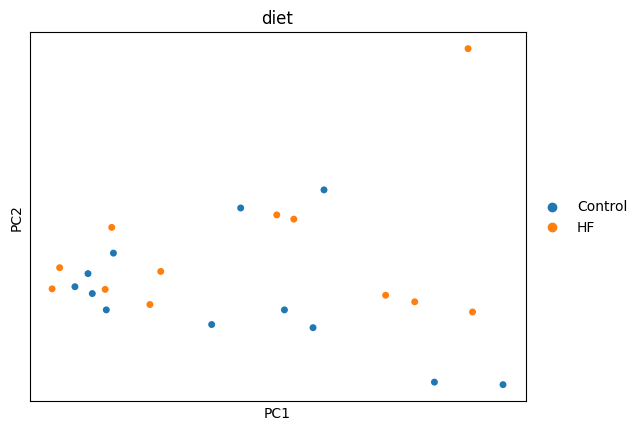

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.63 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
3110082J24Rik,0.154245,1.027044,1.557181,0.659553,0.509540,NaN
6330411D24Rik,10.258650,-0.039410,0.495117,-0.079598,0.936557,0.997657
A2ml1,0.151762,-0.303816,1.792380,-0.169504,0.865400,NaN
A3galt2,1.989109,-0.069129,0.497180,-0.139042,0.889417,0.994596
AABR07000398.1,228.243613,0.316427,0.258371,1.224701,0.220688,0.880069
...,...,...,...,...,...,...
hist1h2ail2,0.657771,0.634631,0.838137,0.757192,0.448935,0.950065
mrpl11,2.066997,-0.159127,0.551614,-0.288475,0.772983,0.984670
mrpl24,5.124246,0.002290,0.325674,0.007030,0.994391,0.998985
mrpl9,3.148757,1.089310,0.403013,2.702914,0.006873,0.365573


/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Immune_Cells_HF_vs_Control_diet_comparison....


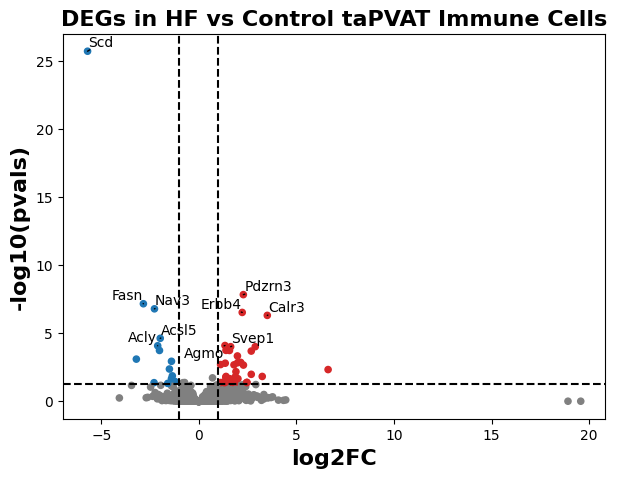

Comparing across diet in taPVAT Endothelial_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 7.67 seconds.

Fitting dispersion trend curve...
... done in 5.06 seconds.

Fitting MAP dispersions...
... done in 9.81 seconds.

Fitting LFCs...
... done in 5.55 seconds.

Refitting 16 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

/mnt/home/

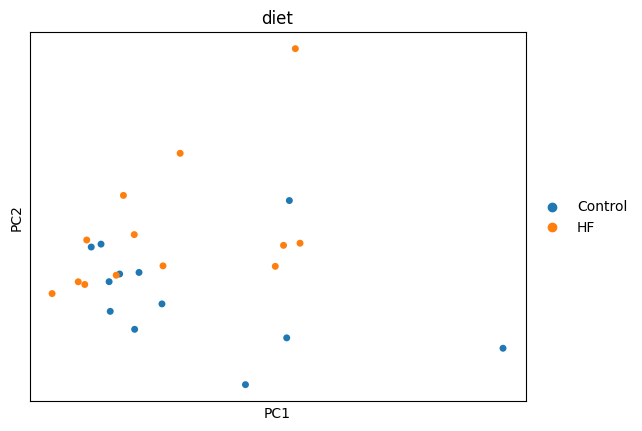

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.83 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
4930455H04Rik,0.657952,0.068718,0.768550,0.089412,0.928754,NaN
6330411D24Rik,0.322260,-0.690384,1.301220,-0.530567,0.595719,NaN
A2ml1,0.083145,-1.451872,2.531774,-0.573461,0.566333,NaN
A3galt2,8.108542,-0.180697,0.268960,-0.671835,0.501689,0.898362
A4galt,0.186706,-2.573652,2.153024,-1.195366,0.231944,NaN
...,...,...,...,...,...,...
hist1h2ail2,1.345321,0.030583,0.648477,0.047161,0.962385,NaN
mrpl11,5.146314,-0.185820,0.329720,-0.563570,0.573047,0.925987
mrpl24,10.934196,-0.059288,0.221373,-0.267819,0.788839,0.973651
mrpl9,7.630979,-0.171959,0.247338,-0.695238,0.486906,0.892770


/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Endothelial_Cells_HF_vs_Control_diet_comparison....


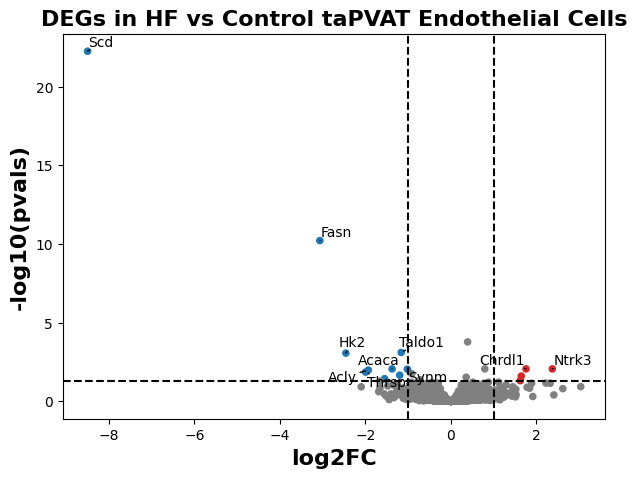

Comparing across diet in taPVAT Pericytes


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.45 seconds.

Fitting dispersion trend curve...
... done in 4.56 seconds.

Fitting MAP dispersions...
... done in 7.91 seconds.

Fitting LFCs...
... done in 4.91 seconds.

Refitting 15 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MA

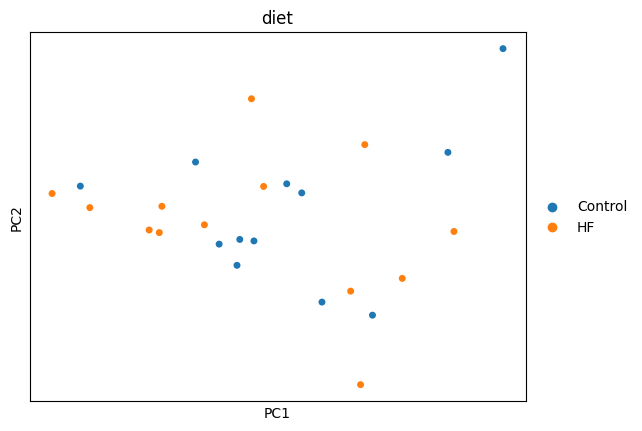

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.56 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
A3galt2,1.287093,-1.237431,0.690733,-1.791475,0.073217,NaN
AABR07000398.1,103.855907,0.163348,0.209676,0.779050,0.435950,0.967643
AABR07000544.1,1.041905,-0.278105,0.697539,-0.398694,0.690118,NaN
AABR07001942.1,3.108596,-0.694927,0.442756,-1.569549,0.116520,0.800895
AABR07002627.1,0.176734,-0.745678,1.618659,-0.460676,0.645031,NaN
...,...,...,...,...,...,...
Zzz3,15.441128,0.191088,0.186387,1.025220,0.305259,0.924607
mrpl11,1.599747,-0.218459,0.529046,-0.412929,0.679658,NaN
mrpl24,2.740518,-0.135516,0.459080,-0.295190,0.767849,0.995234
mrpl9,1.821945,0.267806,0.499751,0.535879,0.592042,NaN


/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Pericytes_HF_vs_Control_diet_comparison....


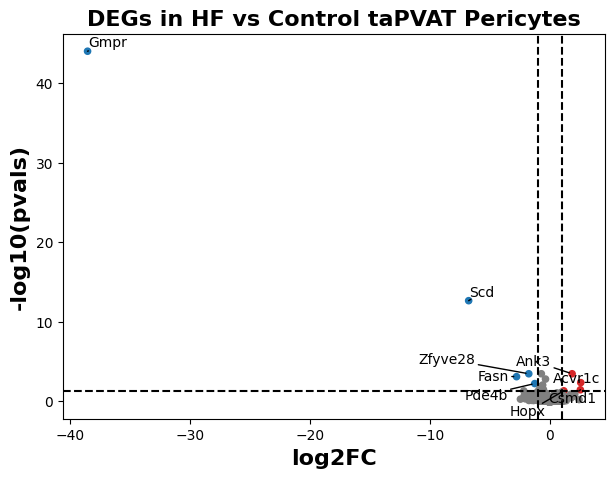

Comparing across diet in taPVAT Mesothelial_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 6.70 seconds.

Fitting dispersion trend curve...
... done in 4.46 seconds.

Fitting MAP dispersions...
... done in 7.62 seconds.

Fitting LFCs...
... done in 4.89 seconds.

Refitting 8 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

/mnt/home/t

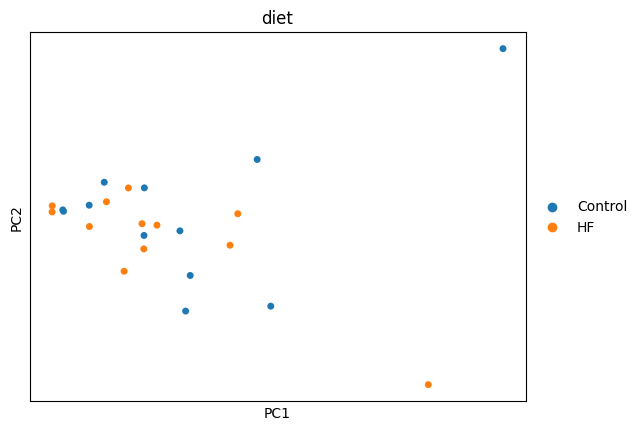

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.62 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
4930455H04Rik,0.114972,-1.719736,2.134772,-0.805583,0.420483,0.999422
6330411D24Rik,0.245019,0.641756,1.585316,0.404812,0.685615,0.999422
A3galt2,0.537386,0.132814,0.878396,0.151201,0.879817,0.999422
AABR07000398.1,104.881091,0.367654,0.245237,1.499177,0.133828,0.999422
AABR07000544.1,0.380520,-0.466131,1.129985,-0.412511,0.679965,0.999422
...,...,...,...,...,...,...
hist1h2ail2,1.360970,-0.310924,0.564230,-0.551060,0.581593,0.999422
mrpl11,1.094775,0.530223,0.604689,0.876853,0.380567,0.999422
mrpl24,2.342370,-0.844208,0.502073,-1.681444,0.092677,0.999422
mrpl9,0.934873,0.460190,0.650664,0.707261,0.479404,0.999422


files saved to: ../output/DEGs/taPVAT_Mesothelial_Cells_HF_vs_Control_diet_comparison....


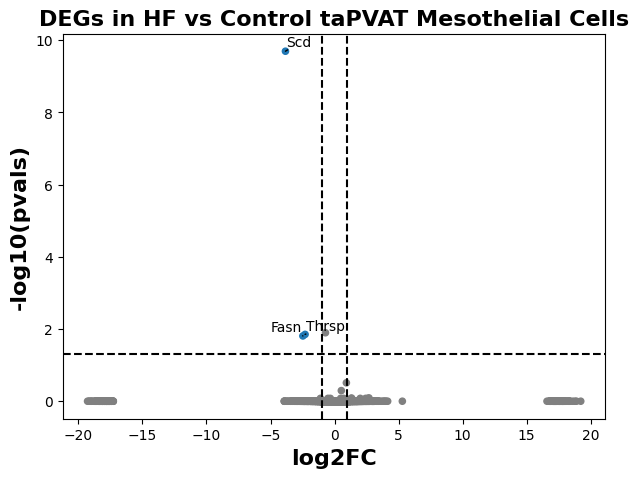

Comparing across diet in taPVAT Neuronal_Cells
There are less than 12 cells of this cell type in the following samples:
sample_id
P_CTRL_8W_F_02     2
P_HF_8W_F_02       2
P_HF_8W_M_01       2
P_CTRL_8W_M_01     2
P_HF_24W_M_01      2
P_CTRL_8W_F_01     2
P_CTRL_24W_F_03    1
P_CTRL_8W_M_03     1
P_HF_24W_F_02      1
P_CTRL_8W_M_02     1
P_HF_24W_M_02      1
Name: count, dtype: int64
Comparing across diet in taPVAT SMCs
There are less than 12 cells of this cell type in the following samples:
sample_id
P_CTRL_8W_F_03    2
P_CTRL_8W_M_01    2
P_HF_8W_F_03      1
P_HF_8W_M_01      1
P_HF_8W_M_02      1
P_CTRL_8W_M_03    1
P_HF_8W_F_02      1
Name: count, dtype: int64
Comparing across time in taPVAT Fibroblasts
There are less than 12 cells of this cell type in the following samples:
sample_id
P_HF_24W_F_01    1
Name: count, dtype: int64
Comparing across time in taPVAT Adipocytes


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 9.53 seconds.

Fitting dispersion trend curve...
... done in 6.20 seconds.

Fitting MAP dispersions...
... done in 12.58 seconds.

Fitting LFCs...
... done in 6.43 seconds.

Refitting 51 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.04 seconds.

Fitting LFCs...
... done in 0.04 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



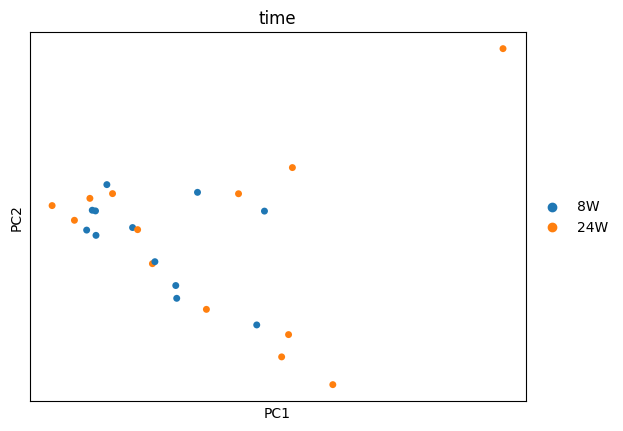

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 8.17 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
3110082J24Rik,31.829409,-0.693546,0.361839,-1.916727,0.055273,0.194971
4930404H24Rik,0.355915,1.683642,1.406687,1.196885,0.231352,NaN
4930455H04Rik,3.198805,0.091486,0.477454,0.191611,0.848047,0.928607
6330411D24Rik,4.262944,0.403208,0.677725,0.594943,0.551881,0.746910
A1cf,0.922657,-1.468058,0.976453,-1.503460,0.132720,NaN
...,...,...,...,...,...,...
hist1h2ail2,2.955139,-0.903842,0.492004,-1.837062,0.066201,0.218500
mrpl11,221.660670,0.053085,0.083358,0.636836,0.524231,0.727135
mrpl24,295.321602,0.034837,0.100660,0.346086,0.729278,0.860946
mrpl9,71.582780,-0.380923,0.118080,-3.225978,0.001255,0.016060


/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Adipocytes_24W_vs_8W_time_comparison....


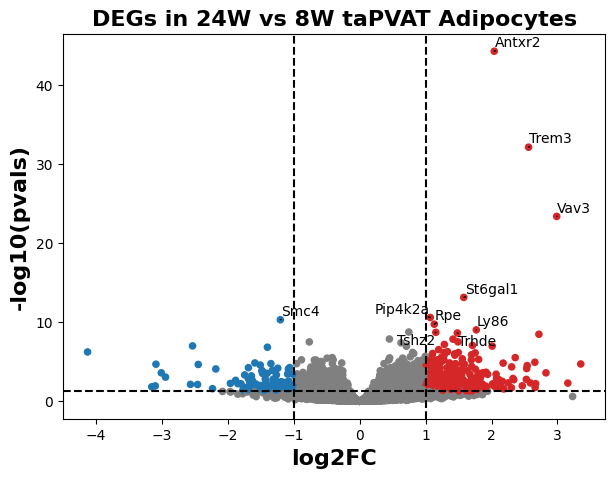

Comparing across time in taPVAT Immune_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 7.32 seconds.

Fitting dispersion trend curve...
... done in 4.85 seconds.

Fitting MAP dispersions...
... done in 8.28 seconds.

Fitting LFCs...
... done in 5.08 seconds.

Refitting 40 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.05 seconds.

Fitting LFCs...
... done in 0.02 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



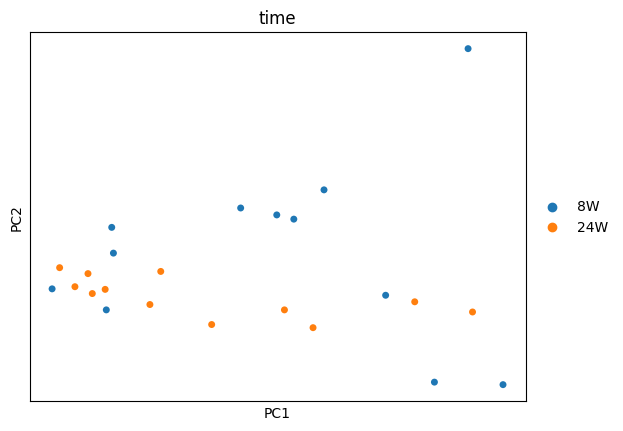

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.65 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
3110082J24Rik,0.154245,-0.379969,1.519431,-0.250073,0.802531,NaN
6330411D24Rik,10.258650,0.578218,0.479961,1.204719,0.228312,0.710100
A2ml1,0.151762,-17.211303,266.351139,-0.064619,0.948477,NaN
A3galt2,1.989109,0.015354,0.502850,0.030534,0.975641,0.997722
AABR07000398.1,228.243613,-0.376267,0.255383,-1.473345,0.140658,0.625448
...,...,...,...,...,...,...
hist1h2ail2,0.657771,-0.804121,0.870575,-0.923666,0.355660,NaN
mrpl11,2.066997,0.198255,0.550205,0.360329,0.718601,0.931902
mrpl24,5.124246,-0.120471,0.324264,-0.371522,0.710249,0.929887
mrpl9,3.148757,0.163437,0.406220,0.402337,0.687436,0.922530


/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Immune_Cells_24W_vs_8W_time_comparison....


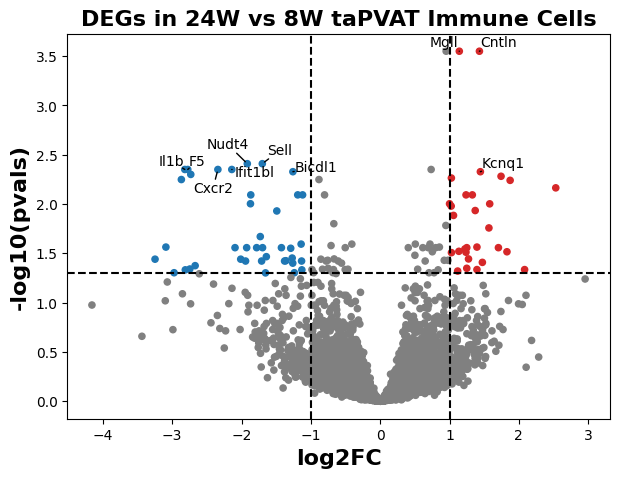

Comparing across time in taPVAT Endothelial_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 7.57 seconds.

Fitting dispersion trend curve...
... done in 4.98 seconds.

Fitting MAP dispersions...
... done in 9.55 seconds.

Fitting LFCs...
... done in 5.54 seconds.

Refitting 6 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

/mnt/home/t

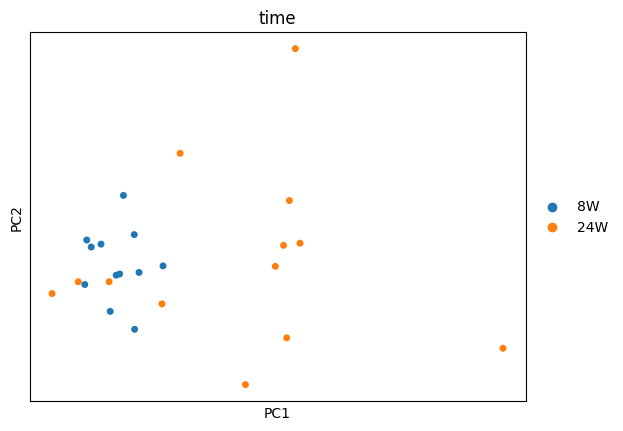

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.81 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
4930455H04Rik,0.657952,1.209474,0.899727,1.344268,0.178862,NaN
6330411D24Rik,0.322260,-0.663453,1.291867,-0.513561,0.607559,NaN
A2ml1,0.083145,-0.137024,2.471950,-0.055432,0.955795,NaN
A3galt2,8.108542,-0.595155,0.257763,-2.308924,0.020948,0.162314
A4galt,0.186706,-0.424812,1.884459,-0.225429,0.821645,NaN
...,...,...,...,...,...,...
hist1h2ail2,1.345321,-1.231951,0.601241,-2.049013,0.040461,NaN
mrpl11,5.146314,-0.351357,0.326901,-1.074814,0.282458,0.650779
mrpl24,10.934196,-0.265094,0.220311,-1.203271,0.228871,0.597510
mrpl9,7.630979,0.112344,0.251423,0.446832,0.654996,0.886348


/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Endothelial_Cells_24W_vs_8W_time_comparison....


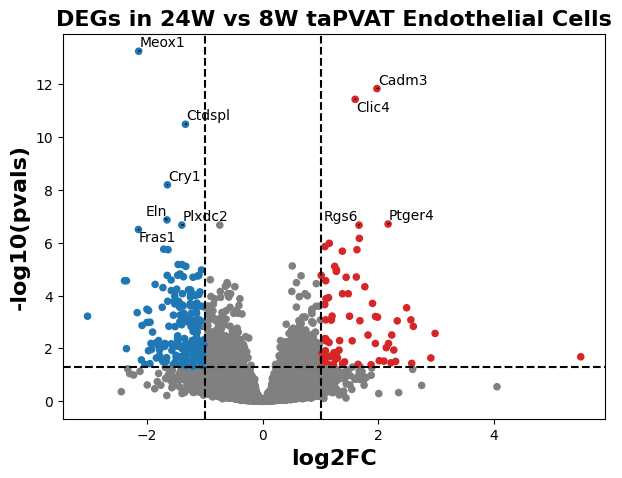

Comparing across time in taPVAT Pericytes


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.39 seconds.

Fitting dispersion trend curve...
... done in 4.20 seconds.

Fitting MAP dispersions...
... done in 7.85 seconds.

Fitting LFCs...
... done in 4.85 seconds.

Refitting 9 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

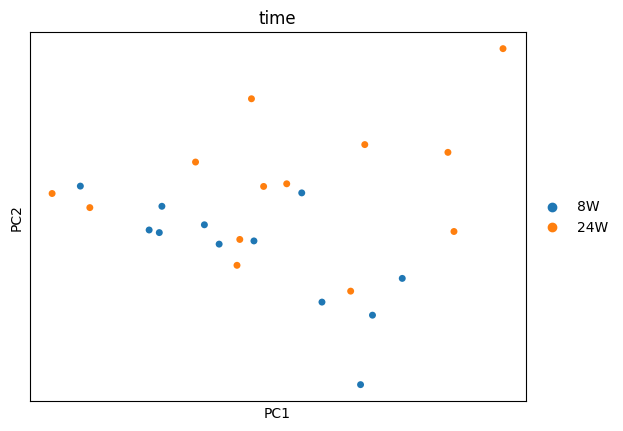

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.51 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
A3galt2,1.287093,-1.233216,0.672383,-1.834097,0.066640,NaN
AABR07000398.1,103.855907,-0.460946,0.192039,-2.400278,0.016383,0.343618
AABR07000544.1,1.041905,-0.160124,0.693821,-0.230785,0.817482,NaN
AABR07001942.1,3.108596,-0.150545,0.454224,-0.331433,0.740318,0.968372
AABR07002627.1,0.176734,-0.828330,1.591418,-0.520498,0.602716,NaN
...,...,...,...,...,...,...
Zzz3,15.441128,0.133677,0.188468,0.709283,0.478149,0.906769
mrpl11,1.599747,-0.080117,0.530114,-0.151132,0.879872,NaN
mrpl24,2.740518,-0.239155,0.461274,-0.518468,0.604132,0.945137
mrpl9,1.821945,-0.201523,0.500059,-0.402998,0.686950,NaN


/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Pericytes_24W_vs_8W_time_comparison....


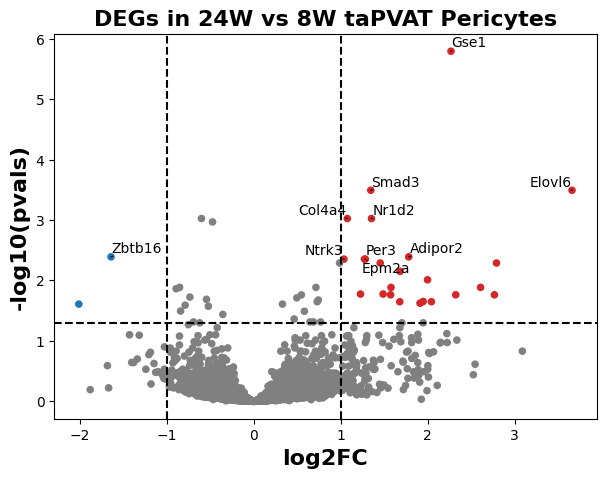

Comparing across time in taPVAT Mesothelial_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 6.89 seconds.

Fitting dispersion trend curve...
... done in 4.23 seconds.

Fitting MAP dispersions...
... done in 7.56 seconds.

Fitting LFCs...
... done in 5.33 seconds.

Refitting 11 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MA

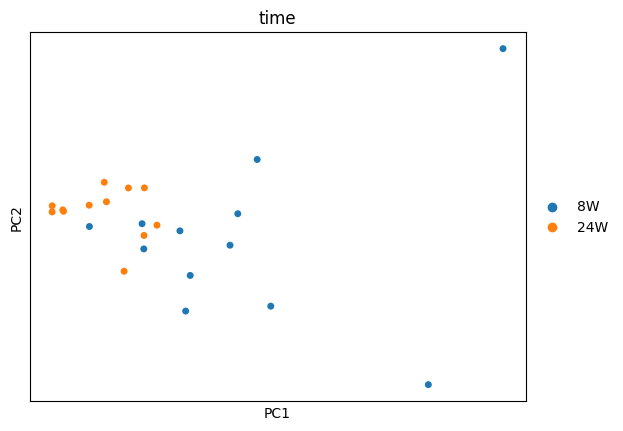

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.56 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
4930455H04Rik,0.114972,-0.256900,2.053502,-0.125103,0.900442,NaN
6330411D24Rik,0.245019,-1.327969,1.909378,-0.695498,0.486743,NaN
A3galt2,0.537386,0.782402,0.859643,0.910148,0.362744,NaN
AABR07000398.1,104.881091,-0.052820,0.255887,-0.206421,0.836462,0.995544
AABR07000544.1,0.380520,-0.122971,1.188554,-0.103462,0.917596,NaN
...,...,...,...,...,...,...
hist1h2ail2,1.360970,0.458488,0.554858,0.826317,0.408624,NaN
mrpl11,1.094775,-0.917659,0.715063,-1.283326,0.199378,NaN
mrpl24,2.342370,-0.810281,0.519713,-1.559092,0.118975,0.811249
mrpl9,0.934873,-1.636423,0.833083,-1.964297,0.049496,NaN


/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Mesothelial_Cells_24W_vs_8W_time_comparison....


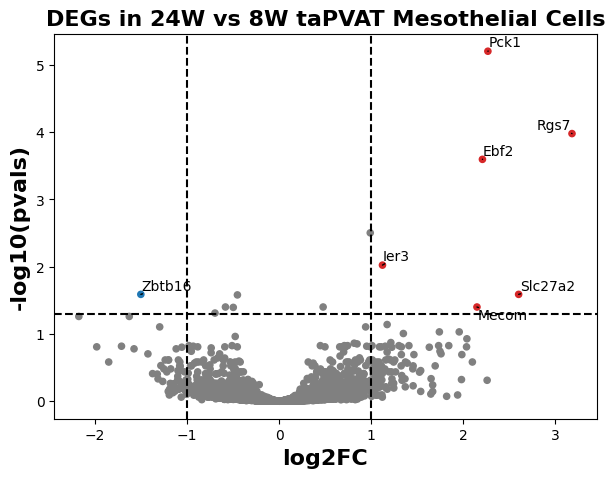

Comparing across time in taPVAT Neuronal_Cells
There are less than 12 cells of this cell type in the following samples:
sample_id
P_CTRL_8W_F_02     2
P_HF_8W_F_02       2
P_HF_8W_M_01       2
P_CTRL_8W_M_01     2
P_HF_24W_M_01      2
P_CTRL_8W_F_01     2
P_CTRL_24W_F_03    1
P_CTRL_8W_M_03     1
P_HF_24W_F_02      1
P_CTRL_8W_M_02     1
P_HF_24W_M_02      1
Name: count, dtype: int64
Comparing across time in taPVAT SMCs
There are less than 12 cells of this cell type in the following samples:
sample_id
P_CTRL_8W_F_03    2
P_CTRL_8W_M_01    2
P_HF_8W_F_03      1
P_HF_8W_M_01      1
P_HF_8W_M_02      1
P_CTRL_8W_M_03    1
P_HF_8W_F_02      1
Name: count, dtype: int64
Comparing across sex in taPVAT Fibroblasts
There are less than 12 cells of this cell type in the following samples:
sample_id
P_HF_24W_F_01    1
Name: count, dtype: int64
Comparing across sex in taPVAT Adipocytes


Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 9.52 seconds.

Fitting dispersion trend curve...
... done in 6.12 seconds.

Fitting MAP dispersions...
... done in 12.53 seconds.

Fitting LFCs...
... done in 6.46 seconds.

Refitting 57 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.05 seconds.

Fitting LFCs...
... done in 0.04 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



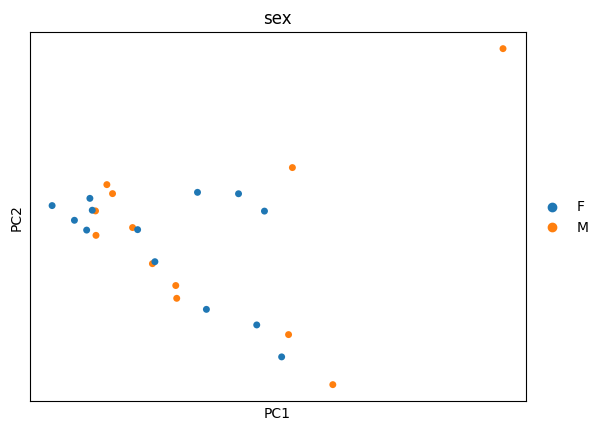

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 8.11 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
3110082J24Rik,31.829409,0.819801,0.348562,2.351950,0.018675,0.162711
4930404H24Rik,0.355915,2.086664,1.352288,1.543062,0.122816,NaN
4930455H04Rik,3.198805,-0.671954,0.460225,-1.460055,0.144275,0.461460
6330411D24Rik,4.262944,0.384963,0.671425,0.573352,0.566406,0.820447
A1cf,0.922657,0.363908,0.989636,0.367719,0.713083,NaN
...,...,...,...,...,...,...
hist1h2ail2,2.955139,1.065694,0.483710,2.203165,0.027583,0.202710
mrpl11,221.660670,0.053855,0.080193,0.671568,0.501859,0.782744
mrpl24,295.321602,0.046798,0.100826,0.464147,0.642542,0.859138
mrpl9,71.582780,0.024894,0.142128,0.175154,0.860959,0.953041


/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Adipocytes_F_vs_M_sex_comparison....


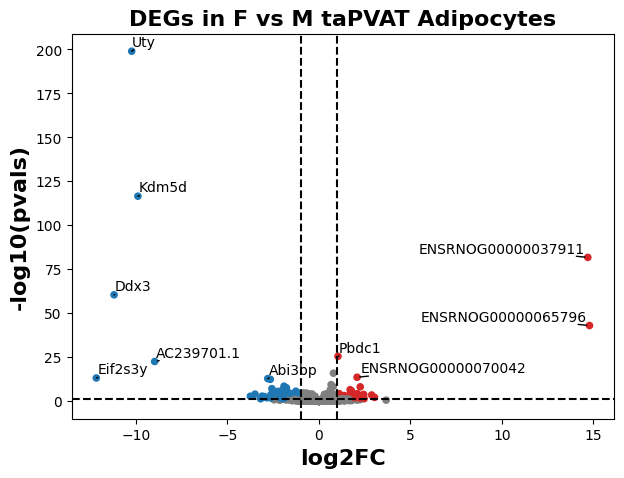

Comparing across sex in taPVAT Immune_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 7.35 seconds.

Fitting dispersion trend curve...
... done in 4.51 seconds.

Fitting MAP dispersions...
... done in 8.31 seconds.

Fitting LFCs...
... done in 5.13 seconds.

Refitting 35 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.04 seconds.

Fitting LFCs...
... done in 0.03 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



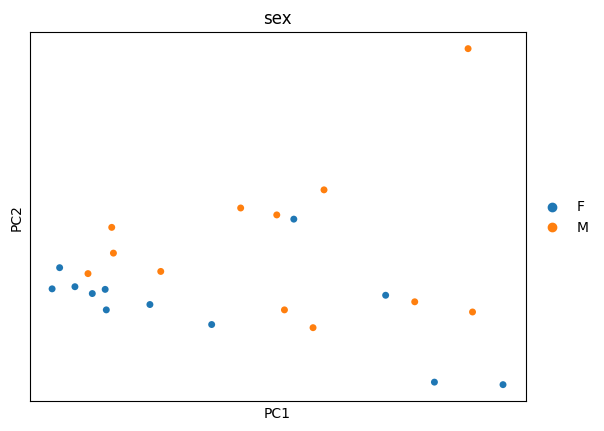

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 7.68 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
3110082J24Rik,0.154245,-0.858436,1.579211,-0.543585,0.586727,NaN
6330411D24Rik,10.258650,0.778845,0.468431,1.662666,0.096379,0.420128
A2ml1,0.151762,-0.716045,1.856960,-0.385601,0.699793,NaN
A3galt2,1.989109,0.742459,0.482659,1.538270,0.123983,NaN
AABR07000398.1,228.243613,-0.086287,0.264713,-0.325962,0.744453,0.915039
...,...,...,...,...,...,...
hist1h2ail2,0.657771,-0.865757,0.879817,-0.984020,0.325106,NaN
mrpl11,2.066997,1.030867,0.504766,2.042266,0.041125,NaN
mrpl24,5.124246,0.434426,0.313281,1.386697,0.165534,NaN
mrpl9,3.148757,-0.199259,0.413562,-0.481810,0.629941,NaN


/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Immune_Cells_F_vs_M_sex_comparison....


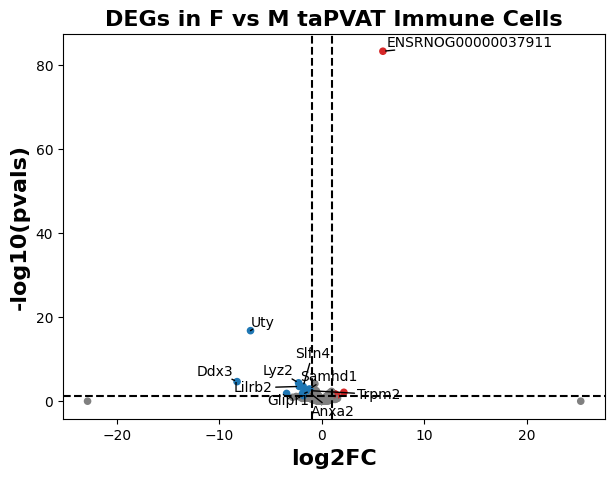

Comparing across sex in taPVAT Endothelial_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 7.61 seconds.

Fitting dispersion trend curve...
... done in 5.05 seconds.

Fitting MAP dispersions...
... done in 9.72 seconds.

Fitting LFCs...
... done in 5.52 seconds.

Refitting 9 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



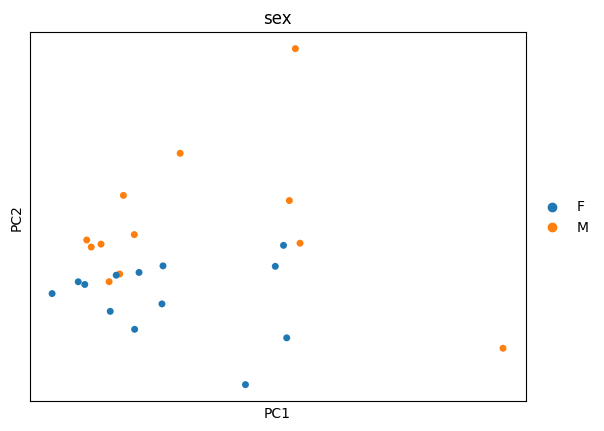

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 7.87 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
4930455H04Rik,0.657952,-0.894290,0.775270,-1.153521,0.248696,NaN
6330411D24Rik,0.322260,0.501416,1.296647,0.386702,0.698977,NaN
A2ml1,0.083145,-1.358903,2.543413,-0.534283,0.593146,NaN
A3galt2,8.108542,0.689803,0.240615,2.866828,0.004146,NaN
A4galt,0.186706,-0.068444,1.895414,-0.036110,0.971195,NaN
...,...,...,...,...,...,...
hist1h2ail2,1.345321,-0.520308,0.646112,-0.805291,0.420652,NaN
mrpl11,5.146314,0.177081,0.333165,0.531510,0.595065,NaN
mrpl24,10.934196,0.380597,0.212925,1.787473,0.073861,NaN
mrpl9,7.630979,0.116633,0.240259,0.485447,0.627359,NaN


/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Endothelial_Cells_F_vs_M_sex_comparison....


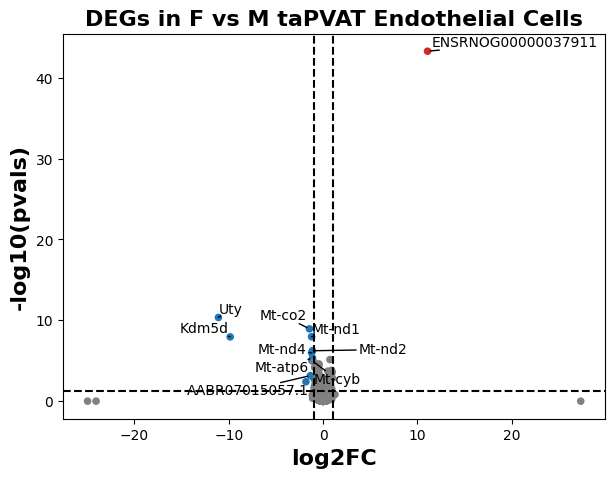

Comparing across sex in taPVAT Pericytes


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.52 seconds.

Fitting dispersion trend curve...
... done in 4.23 seconds.

Fitting MAP dispersions...
... done in 7.89 seconds.

Fitting LFCs...
... done in 5.00 seconds.

Refitting 18 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MA

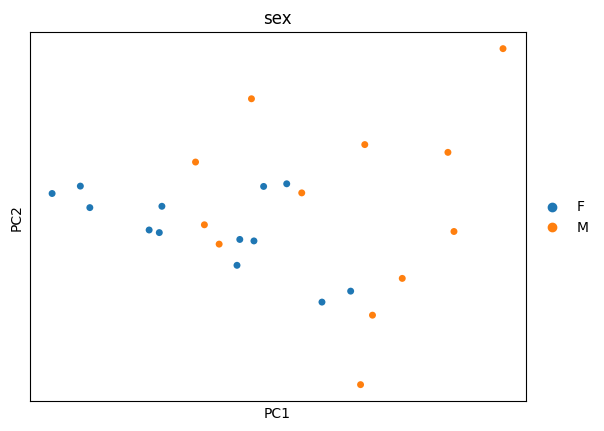

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 7.59 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
A3galt2,1.287093,0.252338,0.686251,0.367706,0.713093,NaN
AABR07000398.1,103.855907,-0.338141,0.205598,-1.644672,0.100038,0.604736
AABR07000544.1,1.041905,-0.387330,0.709068,-0.546253,0.584892,NaN
AABR07001942.1,3.108596,-0.442133,0.464675,-0.951490,0.341356,NaN
AABR07002627.1,0.176734,-0.705213,1.637696,-0.430613,0.666750,NaN
...,...,...,...,...,...,...
Zzz3,15.441128,0.000784,0.190857,0.004110,0.996720,0.998727
mrpl11,1.599747,-0.558421,0.539192,-1.035664,0.300359,NaN
mrpl24,2.740518,0.772780,0.440885,1.752791,0.079638,NaN
mrpl9,1.821945,-0.297167,0.505476,-0.587895,0.556603,NaN


/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Pericytes_F_vs_M_sex_comparison....


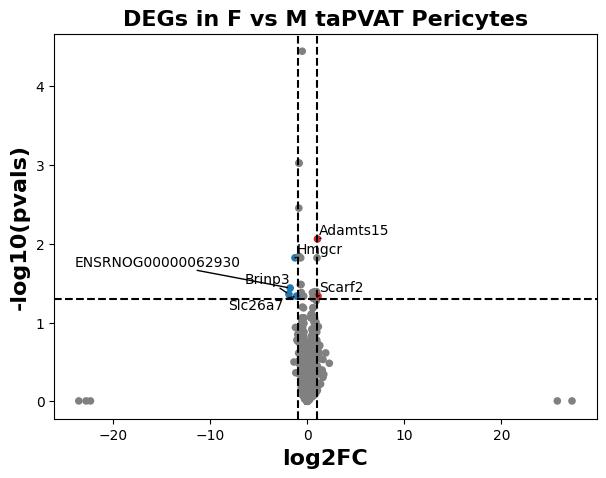

Comparing across sex in taPVAT Mesothelial_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 6.61 seconds.

Fitting dispersion trend curve...
... done in 4.15 seconds.

Fitting MAP dispersions...
... done in 7.50 seconds.

Fitting LFCs...
... done in 4.96 seconds.

Refitting 8 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.03 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/utils.py:767: RuntimeWarning:

M

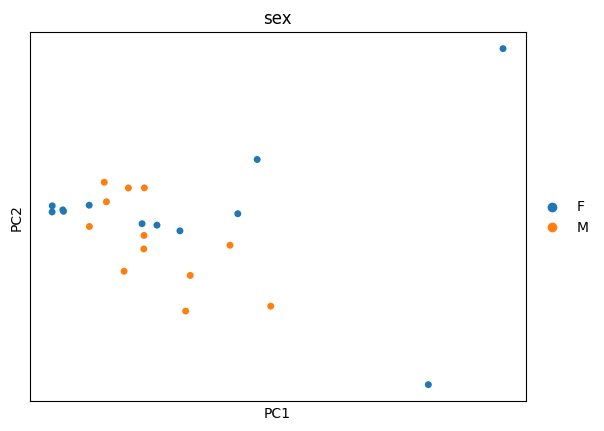

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 7.48 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
4930455H04Rik,0.114972,-17.429780,258.202561,-0.067504,0.946180,NaN
6330411D24Rik,0.245019,-1.304497,1.620031,-0.805229,0.420687,NaN
A3galt2,0.537386,-0.277066,0.882218,-0.314057,0.753478,NaN
AABR07000398.1,104.881091,-0.479772,0.236172,-2.031452,0.042209,0.624241
AABR07000544.1,0.380520,0.168654,1.119821,0.150608,0.880285,NaN
...,...,...,...,...,...,...
hist1h2ail2,1.360970,-0.298400,0.556054,-0.536639,0.591517,NaN
mrpl11,1.094775,0.446955,0.614941,0.726826,0.467332,NaN
mrpl24,2.342370,0.656661,0.483525,1.358069,0.174442,NaN
mrpl9,0.934873,-0.264365,0.676891,-0.390557,0.696125,NaN


/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Mesothelial_Cells_F_vs_M_sex_comparison....


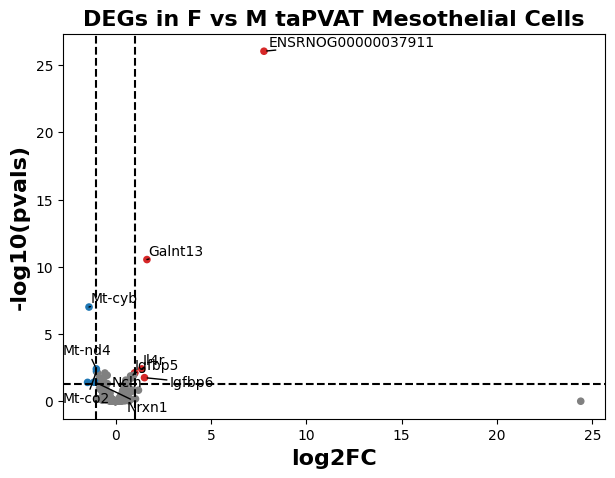

Comparing across sex in taPVAT Neuronal_Cells
There are less than 12 cells of this cell type in the following samples:
sample_id
P_CTRL_8W_F_02     2
P_HF_8W_F_02       2
P_HF_8W_M_01       2
P_CTRL_8W_M_01     2
P_HF_24W_M_01      2
P_CTRL_8W_F_01     2
P_CTRL_24W_F_03    1
P_CTRL_8W_M_03     1
P_HF_24W_F_02      1
P_CTRL_8W_M_02     1
P_HF_24W_M_02      1
Name: count, dtype: int64
Comparing across sex in taPVAT SMCs
There are less than 12 cells of this cell type in the following samples:
sample_id
P_CTRL_8W_F_03    2
P_CTRL_8W_M_01    2
P_HF_8W_F_03      1
P_HF_8W_M_01      1
P_HF_8W_M_02      1
P_CTRL_8W_M_03    1
P_HF_8W_F_02      1
Name: count, dtype: int64
CPU times: user 15min 29s, sys: 1min 20s, total: 16min 49s
Wall time: 22min 39s


In [10]:
%%time
### High level comparisons across 8 broad cell types
deseqRes = []

group_list = ['diet', 'time', 'sex']
group1_list = ['Control', '8W', 'M']
group2_list = ['HF', '24W', 'F']

for i in range(len(group_list)):
    for celltype in adata.obs.celltype_broad.unique():
        print(f'Comparing across {group_list[i]} in taPVAT {celltype}')
              
        adata_subset = adata[adata.obs['celltype_broad'] == celltype].copy()
        celltype = celltype
        group = group_list[i]
        group1 = group1_list[i] 
        group2 = group2_list[i]
        
        ### Get the counts of cells per sample and check if any are less than 3
        sample_counts = adata_subset.obs['sample_id'].value_counts()
        failing_samples = sample_counts[sample_counts < 3]

        ### Check if there are any failing samples before moving on to DEG analysis
        if not failing_samples.empty:
            print("There are less than 12 cells of this cell type in the following samples:")
            print(failing_samples)
            deseqRes
        else:
            ### Run DESeq and save results
            de = return_de(adata_subset, celltype, group, group1, group2)
            de['subset'] = 'None'
            de['sub_id'] = 'None'
            de['sub_2'] = 'None'
            de['sub_id_2'] = 'None'
            de['level'] = 'high'
            deseqRes.append(de)
              
            ### Generate and save volcano plots
            plot_volcano_df(de, celltype, group, group1, group2, return_fig = False, save = False)
            plot_volcano_df_html(de, celltype, group, group1, group2, return_fig = False, save = False)
            plt.show()
        
deseqResults2 = pd.concat(deseqRes)
deseqResults2.to_csv('../output/DEGs/taPVAT_celltype_broad_high_level_deseq_all_genes_all.txt', sep = '\t')

Comparing across diet in taPVAT Fibroblasts_Bmper+_Nrxn1+
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_24W_F_01    1
Name: count, dtype: int64
Comparing across diet in taPVAT Adipocytes_2
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_24W_F_01    2
Name: count, dtype: int64
Comparing across diet in taPVAT Macrophages_M2


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 4.74 seconds.

Fitting dispersion trend curve...
... done in 3.67 seconds.

Fitting MAP dispersions...
... done in 5.73 seconds.

Fitting LFCs...
... done in 4.09 seconds.

Refitting 3 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

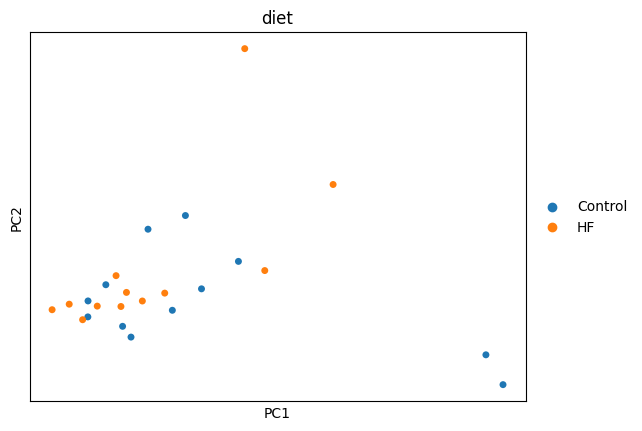

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.39 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
6330411D24Rik,1.352040,0.395791,0.714349,0.554058,0.579539,NaN
A3galt2,1.257140,0.553454,0.612443,0.903681,0.366164,NaN
AABR07000398.1,35.773819,0.010972,0.267407,0.041031,0.967271,0.998346
AABR07002969.1,23.864825,-0.244062,0.190174,-1.283362,0.199365,0.859352
AABR07004891.1,0.489734,-0.617671,0.919463,-0.671774,0.501728,NaN
...,...,...,...,...,...,...
hist1h2ail2,0.322004,2.729060,2.016343,1.353470,0.175905,NaN
mrpl11,0.319461,-0.176015,1.343613,-0.131001,0.895774,NaN
mrpl24,0.620651,0.509747,0.801991,0.635602,0.525036,NaN
mrpl9,0.207148,0.873266,1.359592,0.642300,0.520678,NaN


/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Macrophages_M2_HF_vs_Control_diet_comparison....


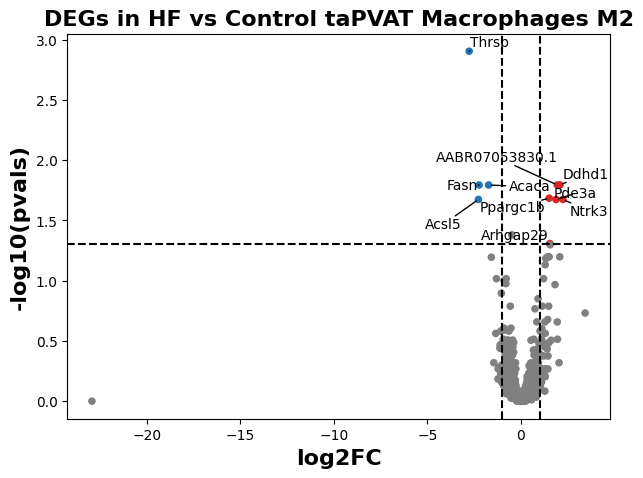

Comparing across diet in taPVAT Adipocytes_Brown


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 9.44 seconds.

Fitting dispersion trend curve...
... done in 5.91 seconds.

Fitting MAP dispersions...
... done in 12.15 seconds.

Fitting LFCs...
... done in 6.25 seconds.

Refitting 66 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.07 seconds.

Fitting MAP dispersions...
... done in 0.06 seconds.

Fitting LFCs...
... done in 0.04 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



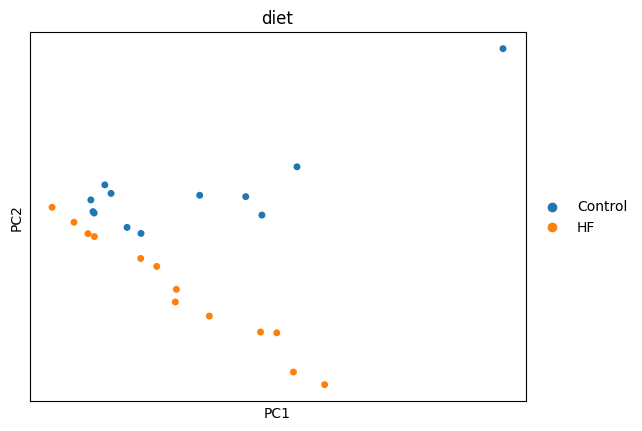

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 8.21 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
3110082J24Rik,31.241640,0.114926,0.367786,0.312480,7.546755e-01,0.869398
4930404H24Rik,0.342480,-0.738087,1.301349,-0.567170,5.705986e-01,NaN
4930455H04Rik,2.738920,0.191623,0.488887,0.391958,6.950892e-01,0.832553
6330411D24Rik,3.924006,0.977091,0.688890,1.418356,1.560869e-01,0.338533
A1cf,0.878748,1.269010,0.993136,1.277781,2.013268e-01,NaN
...,...,...,...,...,...,...
hist1h2ail2,2.661203,-0.765279,0.526150,-1.454487,1.458114e-01,0.323976
mrpl11,208.942702,-0.091600,0.080863,-1.132784,2.573050e-01,0.468180
mrpl24,279.808522,-0.355579,0.071995,-4.938966,7.853797e-07,0.000018
mrpl9,65.575244,-0.163248,0.134452,-1.214177,2.246803e-01,0.430542


/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Adipocytes_Brown_HF_vs_Control_diet_comparison....


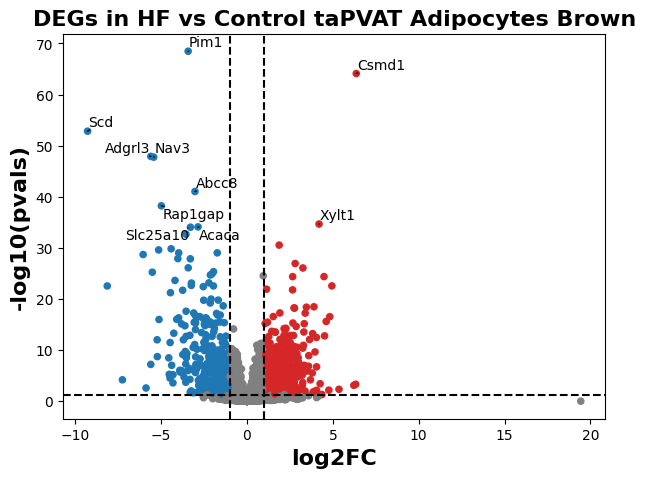

Comparing across diet in taPVAT ECs_Venous_Fbn1+


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.51 seconds.

Fitting dispersion trend curve...
... done in 3.71 seconds.

Fitting MAP dispersions...
... done in 6.75 seconds.

Fitting LFCs...
... done in 4.48 seconds.

Refitting 13 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.01 seconds.

/mnt/home/

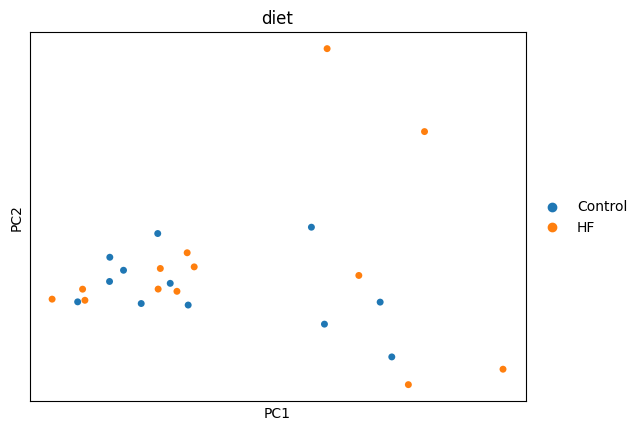

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.48 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
A3galt2,0.813637,-0.333796,0.700355,-0.476609,0.633640,0.999455
AABR07000398.1,44.594482,0.560096,0.317545,1.763832,0.077760,0.999455
AABR07001592.2,0.396992,-1.160801,0.985162,-1.178284,0.238683,0.999455
AABR07001942.1,0.798685,1.122466,0.874281,1.283874,0.199186,0.999455
AABR07002969.1,1.852703,0.292410,0.505276,0.578714,0.562782,0.999455
...,...,...,...,...,...,...
Zzz3,9.478574,0.408466,0.226262,1.805277,0.071031,0.999455
mrpl11,0.250690,1.199595,1.462859,0.820035,0.412196,0.999455
mrpl24,1.257648,0.488793,0.687901,0.710557,0.477359,0.999455
mrpl9,1.210491,0.514846,0.614893,0.837293,0.402428,0.999455


files saved to: ../output/DEGs/taPVAT_ECs_Venous_Fbn1+_HF_vs_Control_diet_comparison....


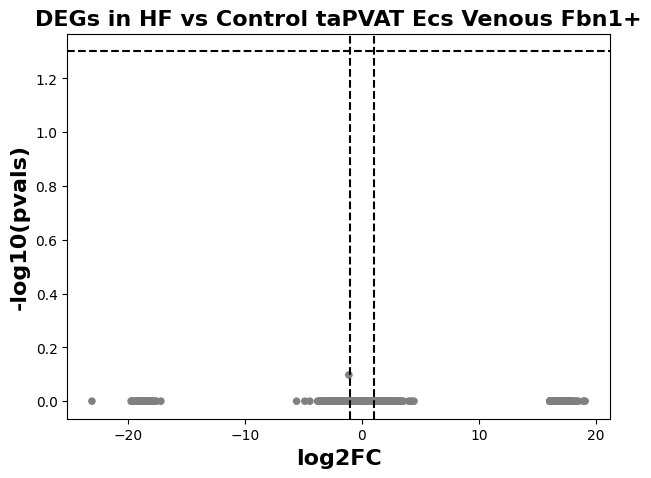

Comparing across diet in taPVAT ECs_Lymph


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.39 seconds.

Fitting dispersion trend curve...
... done in 3.57 seconds.

Fitting MAP dispersions...
... done in 6.54 seconds.

Fitting LFCs...
... done in 4.24 seconds.

Refitting 9 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

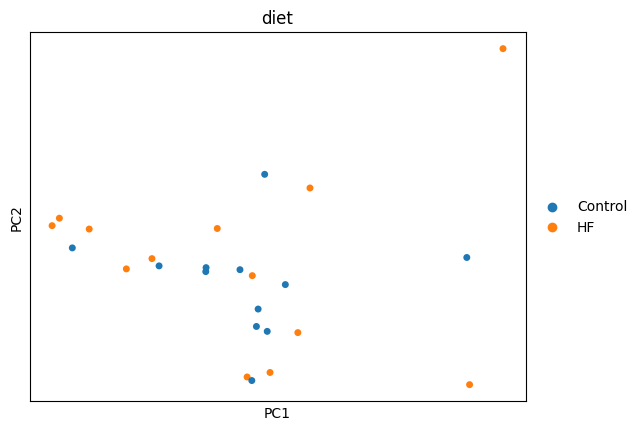

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.36 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
A3galt2,0.230947,-0.088591,1.330750,-0.066572,0.946922,0.999676
AABR07000398.1,31.699712,0.707328,0.410070,1.724895,0.084546,0.999676
AABR07000544.1,0.169785,0.144387,1.499784,0.096272,0.923305,0.999676
AABR07001592.2,0.771572,0.498479,0.732638,0.680390,0.496258,0.999676
AABR07001942.1,0.453397,-0.018506,0.994571,-0.018607,0.985155,0.999676
...,...,...,...,...,...,...
Zzz3,7.110890,0.306890,0.249509,1.229976,0.218706,0.999676
mrpl11,0.569108,-0.735959,1.056552,-0.696567,0.486074,0.999676
mrpl24,1.019733,0.195401,0.613785,0.318354,0.750216,0.999676
mrpl9,0.352539,0.329436,1.112665,0.296078,0.767170,0.999676


files saved to: ../output/DEGs/taPVAT_ECs_Lymph_HF_vs_Control_diet_comparison....


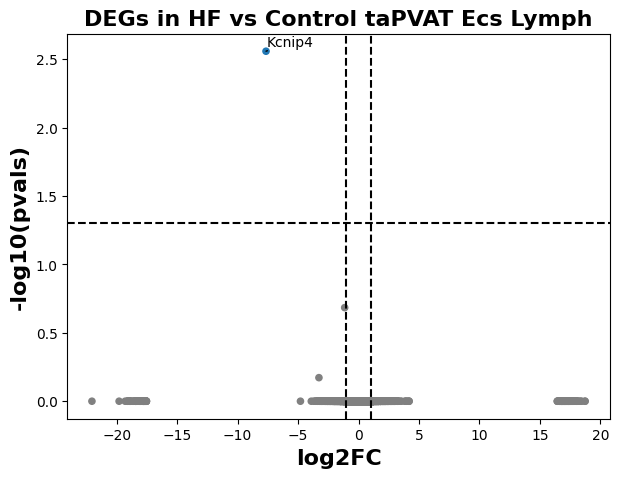

Comparing across diet in taPVAT Fibroblasts_Pi16+


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 6.40 seconds.

Fitting dispersion trend curve...
... done in 4.05 seconds.

Fitting MAP dispersions...
... done in 7.36 seconds.

Fitting LFCs...
... done in 4.66 seconds.

Refitting 14 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.02 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



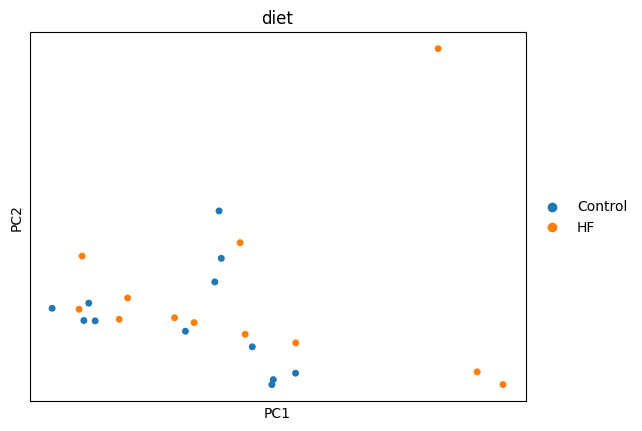

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.56 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
4933400A11Rik,0.227098,-1.586666,1.755702,-0.903722,0.366143,0.999405
6330411D24Rik,0.111472,-0.482464,1.880499,-0.256561,0.797517,0.999405
A3galt2,1.847449,0.081915,0.643398,0.127316,0.898690,0.999405
AABR07000398.1,88.104550,0.307672,0.252311,1.219417,0.222686,0.999405
AABR07000544.1,0.484080,-1.378188,1.488115,-0.926130,0.354379,0.999405
...,...,...,...,...,...,...
Zzz3,11.528841,-0.134255,0.223356,-0.601080,0.547786,0.999405
mrpl11,0.826134,-0.078371,0.794488,-0.098643,0.921422,0.999405
mrpl24,2.015844,-0.074869,0.530852,-0.141036,0.887841,0.999405
mrpl9,1.476131,-0.042903,0.562043,-0.076333,0.939154,0.999405


files saved to: ../output/DEGs/taPVAT_Fibroblasts_Pi16+_HF_vs_Control_diet_comparison....


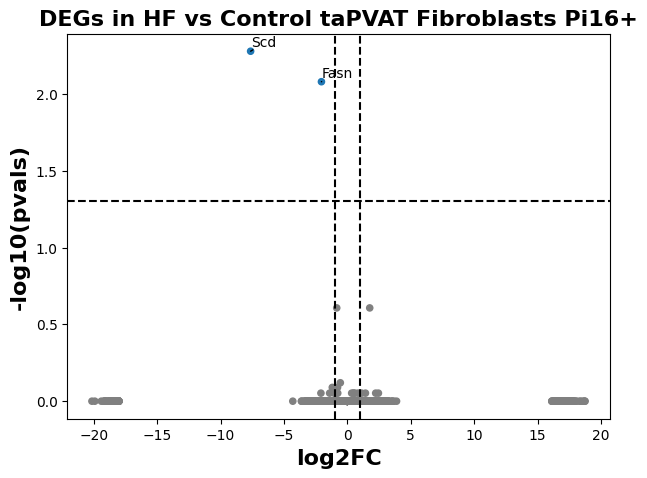

Comparing across diet in taPVAT ECs_Artery


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.20 seconds.

Fitting dispersion trend curve...
... done in 3.97 seconds.

Fitting MAP dispersions...
... done in 7.44 seconds.

Fitting LFCs...
... done in 4.87 seconds.

Refitting 3 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

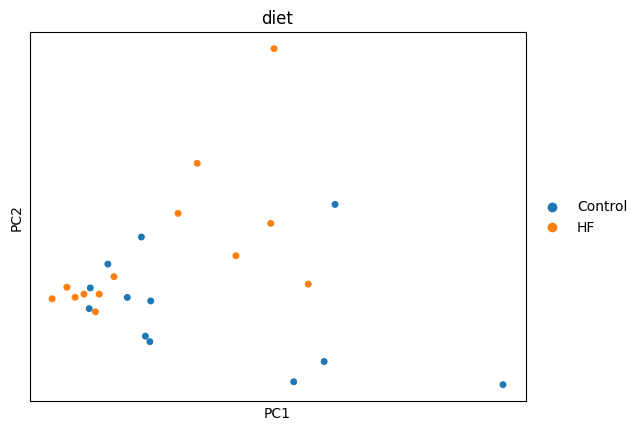

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.67 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
4930455H04Rik,0.138071,1.422231,1.657006,0.858314,0.390719,0.998371
6330411D24Rik,0.043727,1.015367,2.910328,0.348884,0.727176,0.998371
A3galt2,2.520876,-0.259688,0.447513,-0.580292,0.561718,0.998371
A4galt,0.144901,-2.239874,2.192757,-1.021487,0.307024,0.998371
AABR07000398.1,95.363299,-0.000111,0.243692,-0.000454,0.999637,0.999880
...,...,...,...,...,...,...
hist1h2ail2,0.154302,-2.388807,2.418102,-0.987885,0.323209,0.998371
mrpl11,0.806279,-0.677076,0.787049,-0.860272,0.389639,0.998371
mrpl24,1.874449,0.221917,0.448332,0.494984,0.620612,0.998371
mrpl9,1.279639,0.118273,0.627437,0.188502,0.850483,0.998371


files saved to: ../output/DEGs/taPVAT_ECs_Artery_HF_vs_Control_diet_comparison....


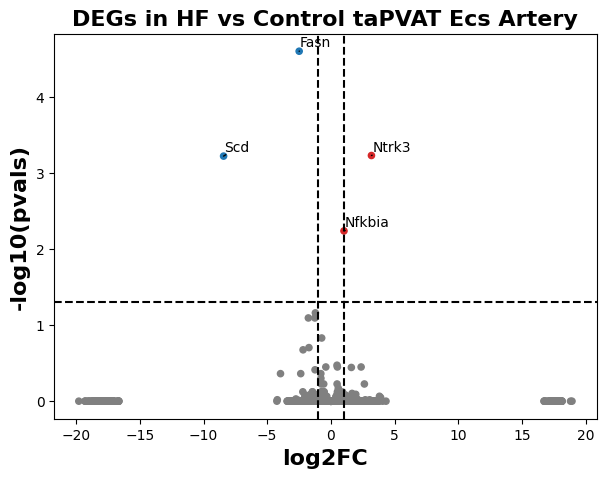

Comparing across diet in taPVAT Adipocytes_3


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 6.62 seconds.

Fitting dispersion trend curve...
... done in 4.39 seconds.

Fitting MAP dispersions...
... done in 8.05 seconds.

Fitting LFCs...
... done in 5.24 seconds.

Refitting 5 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

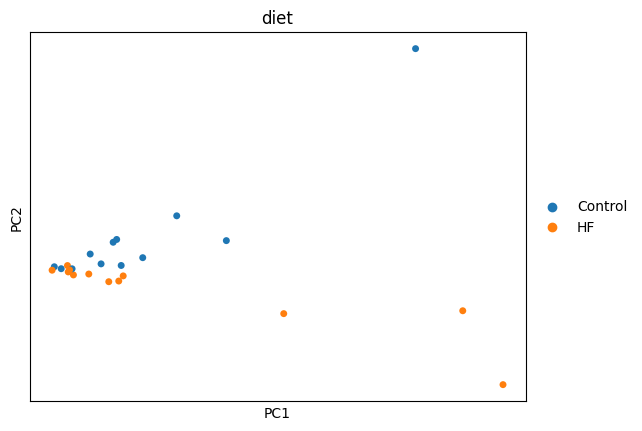

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.63 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
4930455H04Rik,0.256205,-0.091299,1.340970,-0.068084,0.945719,NaN
6330411D24Rik,0.182879,2.261484,2.131773,1.060846,0.288760,NaN
AABR07000398.1,186.602801,0.113982,0.244729,0.465749,0.641395,0.993019
AABR07000544.1,0.676014,0.283464,0.794694,0.356695,0.721320,NaN
AABR07001512.1,0.071297,0.401599,2.233153,0.179835,0.857282,NaN
...,...,...,...,...,...,...
hist1h2ail2,0.239472,-0.509508,1.448399,-0.351774,0.725008,NaN
mrpl11,6.871847,-0.047797,0.324607,-0.147247,0.882937,0.997004
mrpl24,8.011141,0.012800,0.241148,0.053078,0.957670,0.998410
mrpl9,3.031601,-0.258350,0.434251,-0.594932,0.551889,0.986143


/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Adipocytes_3_HF_vs_Control_diet_comparison....


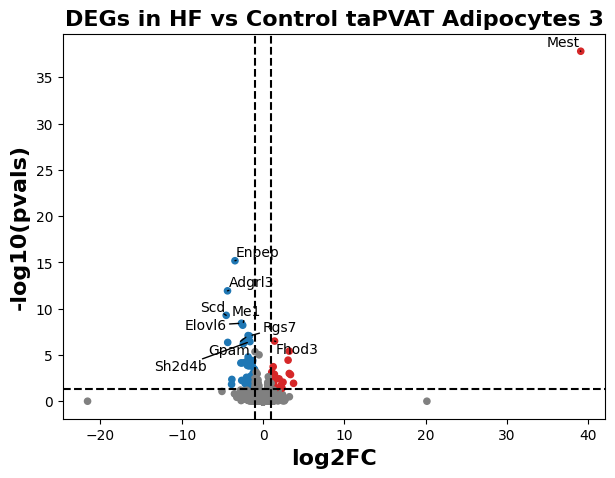

Comparing across diet in taPVAT Macrophages_M2_F13a1+


In [ ]:
%%time
### High level comparisons across 28 specific cell types
deseqRes = []

group_list = ['diet', 'time', 'sex']
group1_list = ['Control', '8W', 'M']
group2_list = ['HF', '24W', 'F']

celltypes = adata.obs.celltype.unique()
excluded_celltypes = ['Mesothelial_Cells', 'Pericytes', 'SMCs', 'Neuronal_Cells']
filtered_celltypes = [ct for ct in celltypes if ct not in excluded_celltypes]

for i in range(len(group_list)):
    for celltype in filtered_celltypes:
        print(f'Comparing across {group_list[i]} in taPVAT {celltype}')
              
        adata_subset = adata[adata.obs['celltype'] == celltype].copy()
        celltype = celltype
        group = group_list[i]
        group1 = group1_list[i] 
        group2 = group2_list[i]
        
        ### Get the counts of cells per sample and check if any are less than 3
        sample_counts = adata_subset.obs['sample_id'].value_counts()
        failing_samples = sample_counts[sample_counts < 3]

        ### Check if there are any failing samples before moving on to DEG analysis
        if not failing_samples.empty:
            print("There are less than 3 cells of this cell type in the following samples:")
            print(failing_samples)
            deseqRes
        else:
            ### Run DESeq and save results
            de = return_de(adata_subset, celltype, group, group1, group2)
            de['subset'] = 'None'
            de['sub_id'] = 'None'
            de['sub_2'] = 'None'
            de['sub_id_2'] = 'None'
            de['level'] = 'high'
            deseqRes.append(de)

            ### Generate and save volcano plots
            plot_volcano_df(de, celltype, group, group1, group2, return_fig = False, save = True)
            plot_volcano_df_html(de, celltype, group, group1, group2, return_fig = False, save = True)
            plt.show()
        
deseqResults3 = pd.concat(deseqRes)
deseqResults3.to_csv('../output/DEGs/taPVAT_celltype_high_level_deseq_all_genes_all.txt', sep = '\t')

## Mid-level comparisons

In [ ]:
%%time
### Mid-level comparisons across whole-tissue
deseqRes = []

celltype = 'whole_tissue'
group_list = ['time', 'time', 'diet', 'diet', 'sex', 'sex', 'diet', 'diet', 'time', 'time', 'sex', 'sex']
group1_list = ['8W', '8W', 'Control', 'Control', 'M', 'M', 'Control', 'Control', '8W', '8W', 'M', 'M']
group2_list = ['24W', '24W', 'HF', 'HF', 'F', 'F', 'HF', 'HF', '24W', '24W', 'F', 'F']

sub_list = ['diet', 'diet', 'time', 'time', 'diet', 'diet', 'sex', 'sex', 'sex', 'sex', 'time', 'time']
sub_id = ['HF', 'Control', '8W', '24W', 'HF', 'Control', 'M', 'F', 'M', 'F', '8W', '24W']

more_info_list = ['_HF_M_F', '_Control_M_F', '_8W_M_F', '_24W_M_F', '_HF_8W_24W', '_Control_8W_24W',
                  '_M_8W_24W', '_F_8W_24W', '_M_Control_HF', '_F_Control_HF', '_8W_Control_HF', '_24W_Control_HF']

for i in range(len(group_list)):
    print(f'Comparing across {group_list[i]} in taPVAT {celltype}')
    adata_subset = adata[(adata.obs[sub_list[i]] == sub_id[i])].copy()   
          
    celltype = celltype
    group = group_list[i]
    group1 = group1_list[i] 
    group2 = group2_list[i]
    more_info = more_info_list[i]
    
    ### Get the counts of cells per sample and check if any are less than 3
    sample_counts = adata_subset.obs['sample_id'].value_counts()
    failing_samples = sample_counts[sample_counts < 3]

    ### Check if there are any failing samples before moving on to DEG analysis
    if not failing_samples.empty:
        print("There are less than 3 cells of this cell type in the following samples:")
        print(failing_samples)
        deseqRes
    else:
        ### Run DESeq and save results
        de = return_de(adata_subset, celltype, group, group1, group2, more_info = more_info)
        de['subset'] = sub_list[i]
        de['sub_id'] = sub_id[i]
        de['sub_2'] = 'None'
        de['sub_id_2'] = 'None'
        de['level'] = 'mid'
        deseqRes.append(de)

        ### Generate and save volcano plots
        plot_volcano_df(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
        plot_volcano_df_html(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
        plt.show()
    
deseqResults4 = pd.concat(deseqRes)
deseqResults4.to_csv('../output/DEGs/taPVAT_whole_tissue_mid_level_deseq_all_genes_all.txt', sep = '\t')

In [ ]:
%%time
### Mid level comparisons across 8 broad cell types
deseqRes = []

group_list = ['time', 'time', 'diet', 'diet', 'sex', 'sex', 'diet', 'diet', 'time', 'time', 'sex', 'sex']
group1_list = ['8W', '8W', 'Control', 'Control', 'M', 'M', 'Control', 'Control', '8W', '8W', 'M', 'M']
group2_list = ['24W', '24W', 'HF', 'HF', 'F', 'F', 'HF', 'HF', '24W', '24W', 'F', 'F']

sub_list = ['diet', 'diet', 'time', 'time', 'diet', 'diet', 'sex', 'sex', 'sex', 'sex', 'time', 'time']
sub_id = ['HF', 'Control', '8W', '24W', 'HF', 'Control', 'M', 'F', 'M', 'F', '8W', '24W']

more_info_list = ['_HF_M_F', '_Control_M_F', '_8W_M_F', '_24W_M_F', '_HF_8W_24W', '_Control_8W_24W',
                  '_M_8W_24W', '_F_8W_24W', '_M_Control_HF', '_F_Control_HF', '_8W_Control_HF', '_24W_Control_HF']

for i in range(len(group_list)):
    for celltype in adata.obs.celltype_broad.unique():
        print(f'Comparing across {group_list[i]} in taPVAT {celltype}')
        adata_subset = adata[(adata.obs['celltype_broad'] == celltype) & (adata.obs[sub_list[i]] == sub_id[i])].copy()
              
        celltype = celltype
        group = group_list[i]
        group1 = group1_list[i] 
        group2 = group2_list[i]
        more_info = more_info_list[i]
        
        ### Get the counts of cells per sample and check if any are less than 3
        sample_counts = adata_subset.obs['sample_id'].value_counts()
        failing_samples = sample_counts[sample_counts < 3]

        ### Check if there are any failing samples before moving on to DEG analysis
        if not failing_samples.empty:
            print("There are less than 3 cells of this cell type in the following samples:")
            print(failing_samples)
            deseqRes
        else:
            ### Run DESeq and save results
            de = return_de(adata_subset, celltype, group, group1, group2, more_info = more_info)
            de['subset'] = sub_list[i]
            de['sub_id'] = sub_id[i]
            de['sub_2'] = 'None'
            de['sub_id_2'] = 'None'
            de['level'] = 'mid'
            deseqRes.append(de)

            ### Generate and save volcano plots
            plot_volcano_df(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
            plot_volcano_df_html(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
            plt.show()

deseqResults5 = pd.concat(deseqRes)
deseqResults5.to_csv('../output/DEGs/taPVAT_celltype_broad_mid_level_deseq_all_genes_all.txt', sep = '\t')

In [ ]:
%%time
### Mid level comparisons across 28 specific cell types
deseqRes = []

group_list = ['time', 'time', 'diet', 'diet', 'sex', 'sex', 'diet', 'diet', 'time', 'time', 'sex', 'sex']
group1_list = ['8W', '8W', 'Control', 'Control', 'M', 'M', 'Control', 'Control', '8W', '8W', 'M', 'M']
group2_list = ['24W', '24W', 'HF', 'HF', 'F', 'F', 'HF', 'HF', '24W', '24W', 'F', 'F']

sub_list = ['diet', 'diet', 'time', 'time', 'diet', 'diet', 'sex', 'sex', 'sex', 'sex', 'time', 'time']
sub_id = ['HF', 'Control', '8W', '24W', 'HF', 'Control', 'M', 'F', 'M', 'F', '8W', '24W']

more_info_list = ['_HF_M_F', '_Control_M_F', '_8W_M_F', '_24W_M_F', '_HF_8W_24W', '_Control_8W_24W',
                  '_M_8W_24W', '_F_8W_24W', '_M_Control_HF', '_F_Control_HF', '_8W_Control_HF', '_24W_Control_HF']

celltypes = adata.obs.celltype.unique()
excluded_celltypes = ['Mesothelial_Cells', 'Pericytes', 'SMCs', 'Neuronal_Cells']
filtered_celltypes = [ct for ct in celltypes if ct not in excluded_celltypes]

for i in range(len(group_list)):
    for celltype in filtered_celltypes:
        print(f'Comparing across {group_list[i]} in taPVAT {celltype}')
        adata_subset = adata[(adata.obs['celltype'] == celltype) & (adata.obs[sub_list[i]] == sub_id[i])].copy()
              
        celltype = celltype
        group = group_list[i]
        group1 = group1_list[i] 
        group2 = group2_list[i]
        more_info = more_info_list[i]
        
        # Get the counts of cells per sample and check if any are less than 3
        sample_counts = adata_subset.obs['sample_id'].value_counts()
        failing_samples = sample_counts[sample_counts < 3]

        # Check if there are any failing samples before moving on to DEG analysis
        if not failing_samples.empty:
            print("There are less than 3 cells of this cell type in the following samples:")
            print(failing_samples)
            deseqRes
        else:
            ### Run DESeq and save results
            de = return_de(adata_subset, celltype, group, group1, group2, more_info = more_info)
            de['subset'] = sub_list[i]
            de['sub_id'] = sub_id[i]
            de['sub_2'] = 'None'
            de['sub_id_2'] = 'None'
            de['level'] = 'mid'
            deseqRes.append(de)

            ### Generate and save volcano plots
            plot_volcano_df(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
            plot_volcano_df_html(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
            plt.show()
        
deseqResults6 = pd.concat(deseqRes)
deseqResults6.to_csv('../output/DEGs/taPVAT_celltype_mid_level_deseq_all_genes_all.txt', sep = '\t')

## Low-level comparisons

In [ ]:
%%time
### Low-level comparisons across whole-tissue
deseqRes = []

celltype = 'whole_tissue'
group_list = ['sex', 'sex', 'sex', 'sex', 'time', 'time', 'time', 'time', 'diet', 'diet', 'diet', 'diet']
group1_list = ['M', 'M', 'M', 'M', '8W', '8W', '8W', '8W', 'Control', 'Control', 'Control', 'Control']
group2_list = ['F', 'F', 'F', 'F', '24W', '24W', '24W', '24W', 'HF', 'HF',  'HF', 'HF']

sub_list = ['diet', 'diet', 'diet', 'diet', 'diet', 'diet', 'diet', 'diet', 'time', 'time', 'time', 'time']
sub_id = ['HF', 'HF', 'Control', 'Control', 'HF', 'HF', 'Control', 'Control', '8W', '8W', '24W', '24W']

sub_list_2 = ['time', 'time', 'time', 'time', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex']
sub_id_2 = ['8W', '24W', '8W', '24W', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F']

more_info_list = ['_HF_8W', '_HF_24W', '_Control_8W', '_Control_24W', '_HF_M', '_HF_F',
                  '_Control_M', '_Control_F', '_8W_M', '_8W_F', '_24W_M', '_24W_F']

for i in range(len(group_list)):
    print(f'Comparing across {group_list[i]} in taPVAT {celltype}')
    adata_subset = adata[(adata.obs[sub_list[i]] == sub_id[i]) & (adata.obs[sub_list_2[i]] == sub_id_2[i])].copy()   
          
    celltype = celltype
    group = group_list[i]
    group1 = group1_list[i] 
    group2 = group2_list[i]
    more_info = more_info_list[i]

    # Get the counts of cells per sample and check if any are less than 3
    sample_counts = adata_subset.obs['sample_id'].value_counts()
    failing_samples = sample_counts[sample_counts < 3]

    # Check if there are any failing samples before moving on to DEG analysis
    if not failing_samples.empty:
        print("There are less than 3 cells of this cell type in the following samples:")
        print(failing_samples)
        deseqRes
    else:
        ### Run DESeq and save results
        de = return_de(adata_subset, celltype, group, group1, group2, more_info = more_info)
        de['subset'] = sub_list[i]
        de['sub_id'] = sub_id[i]
        de['sub_2'] = sub_list_2[i]
        de['sub_id_2'] = sub_id_2[i]
        de['level'] = 'low'
        deseqRes.append(de)

        ### Generate and save volcano plots
        plot_volcano_df(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
        plot_volcano_df_html(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
        plt.show()
    
deseqResults7 = pd.concat(deseqRes)
deseqResults7.to_csv('../output/DEGs/taPVAT_whole_tissue_low_level_deseq_all_genes_all.txt', sep = '\t')

In [ ]:
%%time
### Low level comparisons across 8 broad cell types
deseqRes = []

group_list = ['sex', 'sex', 'sex', 'sex', 'time', 'time', 'time', 'time', 'diet', 'diet', 'diet', 'diet']
group1_list = ['M', 'M', 'M', 'M', '8W', '8W', '8W', '8W', 'Control', 'Control', 'Control', 'Control']
group2_list = ['F', 'F', 'F', 'F', '24W', '24W', '24W', '24W', 'HF', 'HF',  'HF', 'HF']

sub_list = ['diet', 'diet', 'diet', 'diet', 'diet', 'diet', 'diet', 'diet', 'time', 'time', 'time', 'time']
sub_id = ['HF', 'HF', 'Control', 'Control', 'HF', 'HF', 'Control', 'Control', '8W', '8W', '24W', '24W']

sub_list_2 = ['time', 'time', 'time', 'time', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex']
sub_id_2 = ['8W', '24W', '8W', '24W', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F']

more_info_list = ['_HF_8W', '_HF_24W', '_Control_8W', '_Control_24W', '_HF_M', '_HF_F',
                  '_Control_M', '_Control_F', '_8W_M', '_8W_F', '_24W_M', '_24W_F']

for i in range(len(group_list)):
    for celltype in adata.obs.celltype_broad.unique():
        print(f'Comparing across {group_list[i]} in taPVAT {celltype}')
        adata_subset = adata[(adata.obs['celltype_broad'] == celltype) & 
                             (adata.obs[sub_list[i]] == sub_id[i]) &
                             (adata.obs[sub_list_2[i]] == sub_id_2[i])].copy()
              
        celltype = celltype
        group = group_list[i]
        group1 = group1_list[i] 
        group2 = group2_list[i]
        more_info = more_info_list[i]
        
        # Get the counts of cells per sample and check if any are less than 3
        sample_counts = adata_subset.obs['sample_id'].value_counts()
        failing_samples = sample_counts[sample_counts < 3]

        # Check if there are any failing samples before moving on to DEG analysis
        if not failing_samples.empty:
            print("There are less than 3 cells of this cell type in the following samples:")
            print(failing_samples)
            deseqRes
        else:
            ### Run DESeq and save results
            de = return_de(adata_subset, celltype, group, group1, group2, more_info = more_info)
            de['subset'] = sub_list[i]
            de['sub_id'] = sub_id[i]
            de['sub_2'] = sub_list_2[i]
            de['sub_id_2'] = sub_id_2[i]
            de['level'] = 'low'
            deseqRes.append(de)

            ### Generate and save volcano plots
            plot_volcano_df(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
            plot_volcano_df_html(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
            plt.show()
        
deseqResults8 = pd.concat(deseqRes)
deseqResults8.to_csv('../output/DEGs/taPVAT_celltype_broad_low_level_deseq_all_genes_all.txt', sep = '\t')

In [ ]:
%%time
### Low level comparisons across 28 specific cell types
deseqRes = []

group_list = ['sex', 'sex', 'sex', 'sex', 'time', 'time', 'time', 'time', 'diet', 'diet', 'diet', 'diet']
group1_list = ['M', 'M', 'M', 'M', '8W', '8W', '8W', '8W', 'Control', 'Control', 'Control', 'Control']
group2_list = ['F', 'F', 'F', 'F', '24W', '24W', '24W', '24W', 'HF', 'HF',  'HF', 'HF']

sub_list = ['diet', 'diet', 'diet', 'diet', 'diet', 'diet', 'diet', 'diet', 'time', 'time', 'time', 'time']
sub_id = ['HF', 'HF', 'Control', 'Control', 'HF', 'HF', 'Control', 'Control', '8W', '8W', '24W', '24W']

sub_list_2 = ['time', 'time', 'time', 'time', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex']
sub_id_2 = ['8W', '24W', '8W', '24W', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F']

more_info_list = ['_HF_8W', '_HF_24W', '_Control_8W', '_Control_24W', '_HF_M', '_HF_F',
                  '_Control_M', '_Control_F', '_8W_M', '_8W_F', '_24W_M', '_24W_F']

celltypes = adata.obs.celltype.unique()
excluded_celltypes = ['Mesothelial_Cells', 'Pericytes', 'SMCs', 'Neuronal_Cells']
filtered_celltypes = [ct for ct in celltypes if ct not in excluded_celltypes]

for i in range(len(group_list)):
    for celltype in filtered_celltypes:
        print(f'Comparing across {group_list[i]} in taPVAT {celltype}')
        adata_subset = adata[(adata.obs['celltype'] == celltype) & 
                             (adata.obs[sub_list[i]] == sub_id[i]) &
                             (adata.obs[sub_list_2[i]] == sub_id_2[i])].copy()
              
        celltype = celltype
        group = group_list[i]
        group1 = group1_list[i] 
        group2 = group2_list[i]
        more_info = more_info_list[i]
        
        # Get the counts of cells per sample and check if any are less than 3
        sample_counts = adata_subset.obs['sample_id'].value_counts()
        failing_samples = sample_counts[sample_counts < 3]

        # Check if there are any failing samples before moving on to DEG analysis
        if not failing_samples.empty:
            print("There are less than 3 cells of this cell type in the following samples:")
            print(failing_samples)
            deseqRes
        else:
            ### Run DESeq and save results
            de = return_de(adata_subset, celltype, group, group1, group2, more_info = more_info)
            de['subset'] = sub_list[i]
            de['sub_id'] = sub_id[i]
            de['sub_2'] = sub_list_2[i]
            de['sub_id_2'] = sub_id_2[i]
            de['level'] = 'low'
            deseqRes.append(de)

            ### Generate and save volcano plots
            plot_volcano_df(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
            plot_volcano_df_html(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
            plt.show()
        
deseqResults9 = pd.concat(deseqRes)
deseqResults9.to_csv('../output/DEGs/taPVAT_celltype_low_level_deseq_all_genes_all.txt', sep = '\t')

## Saving all DESeq results as a single tsv file

In [ ]:
deseqResults1 = pd.read_csv('../output/DEGs/taPVAT_whole_tissue_high_level_deseq_all_genes_all.txt', sep = '\t', index_col = 0)
deseqResults2 = pd.read_csv('../output/DEGs/taPVAT_celltype_broad_high_level_deseq_all_genes_all.txt', sep = '\t', index_col = 0)
deseqResults3 = pd.read_csv('../output/DEGs/taPVAT_celltype_high_level_deseq_all_genes_all.txt', sep = '\t', index_col = 0)
deseqResults4 = pd.read_csv('../output/DEGs/taPVAT_whole_tissue_mid_level_deseq_all_genes_all.txt', sep = '\t', index_col = 0)
deseqResults5 = pd.read_csv('../output/DEGs/taPVAT_celltype_broad_mid_level_deseq_all_genes_all.txt', sep = '\t', index_col = 0)
deseqResults6 = pd.read_csv('../output/DEGs/taPVAT_celltype_mid_level_deseq_all_genes_all.txt', sep = '\t', index_col = 0)
deseqResults7 = pd.read_csv('../output/DEGs/taPVAT_whole_tissue_low_level_deseq_all_genes_all.txt', sep = '\t', index_col = 0)
deseqResults8 = pd.read_csv('../output/DEGs/taPVAT_celltype_broad_low_level_deseq_all_genes_all.txt', sep = '\t', index_col = 0)
deseqResults9 = pd.read_csv('../output/DEGs/taPVAT_celltype_low_level_deseq_all_genes_all.txt', sep = '\t', index_col = 0)

In [ ]:
deseqResults_list = [deseqResults1, deseqResults2, deseqResults3, deseqResults4, deseqResults5,
                    deseqResults6, deseqResults7, deseqResults8, deseqResults9]
deseqResults_all = pd.concat(deseqResults_list)

In [ ]:
deseqResults_all

In [ ]:
deseqResults_all.to_csv('../output/DEGs/taPVAT_all_comparisons_deseq_all_genes_all.txt', sep = '\t')

In [ ]:
deseq_degs_all = deseqResults_all[deseqResults_all.padj <= 0.05]

In [ ]:
deseq_degs_all = deseqResults_all[(deseqResults_all.padj <= 0.05) & ((deseqResults_all.log2FoldChange >= 1)|(deseqResults_all.log2FoldChange <= -1))]\
    .sort_values('stat', ascending = False)

In [ ]:
deseq_degs_all.to_csv('../output/DEGs/taPVAT_all_comparisons_deseq_all_degs_pvalue_0.05.txt', sep = '\t')

In [ ]:
top_genes = deseq_degs_all[deseq_degs_all['log2FoldChange'] >= 1]
bottom_genes = deseq_degs_all[deseq_degs_all['log2FoldChange'] <= -1]

In [ ]:
top_genes.to_csv('../output/DEGs/taPVAT_all_comparisons_deseq_all_degs_pvalue_0.05_top.txt', sep = '\t')
bottom_genes.to_csv('../output/DEGs/taPVAT_all_comparisons_deseq_all_degs_pvalue_0.05_bottom.txt', sep = '\t')

## To do a single comparison

In [ ]:
# group = 'diet' #change to the group you want to compare across
# group1 = 'Control'
# group2 = 'HF'
# subset = 'time'
# subset_id = '24W'
# subset_2 = 'sex'
# subset_id_2 = 'F'
# more_info = 'testing_custom_function'

# celltype = 'Adipocytes'
# adata_subset = adata[(adata.obs['celltype_broad'] == celltype) & (adata.obs[subset] == subset_id) & (adata.obs[subset_2] == subset_id_2)].copy() #adata.copy() #

# # Get the counts of cells per sample and check if any are less than 3
# sample_counts = adata_subset.obs['sample_id'].value_counts()
# failing_samples = sample_counts[sample_counts < 3]

# # Check if there are any failing samples before moving on to DEG analysis
# if not failing_samples.empty:
#     print("There are less than 3 cells of this cell type in the following samples:")
#     print(failing_samples)

# else:
#     de = return_de(adata_subset, celltype, group, group1, group2, more_info = more_info)
#     plot_volcano_df(de, celltype, group, group1, group2, more_info, return_fig = False, save = False)
#     plot_volcano_df_html(de, celltype, group, group1, group2, more_info, return_fig = False, save = False)
#     plt.show()

## Heatmap

In [ ]:
### Creates a heatmap of top 5 up or downregulated genes in each celltype, I think?
### This is ugly and I don't like it.
# combined_indices = top_genes_df.index.tolist() + bottom_genes_df.index.tolist()

# selected_genes =  list(set(combined_indices))
# selected_data = deseqResults.loc[selected_genes, :]
# selected_data['gene_name'] = selected_data.index
# selected_data = selected_data[selected_data['padj'] <= 0.05]

# # Pivot the DataFrame to wide format for heatmap plotting
# heatmap_data = selected_data.pivot(index='celltype', columns='gene_name', values='log2FoldChange')

# # Fill missing values with 0 in the heatmap_data
# heatmap_data_filled = heatmap_data.fillna(0)

# # Create the heatmap with clustered columns using Seaborn clustermap
# plt.figure(figsize=(20, 12))
# clustered_heatmap = sns.clustermap(
#     heatmap_data_filled,  # Use the filled heatmap_data
#     cmap='coolwarm',  # Choose a colormap
#     annot=False,  # Remove values in cells
#     fmt='',  # Empty format string
#     linewidths=1,  # Add black borders
#     linecolor='black',  # Border color
#     cbar=True,
#     cbar_kws={'label': 'Log2 Fold Change'},  # Customize colorbar label
#     vmin=-10,  # Minimum value for the color scale
#     vmax=10,   # Maximum value for the color scale
#     center=0,  # Set the middle point of the color scale to 0
#     square=True,  # Make the boxes square
#     #row_cluster = False,
#     method='complete',  # Specify clustering method ('single', 'complete', 'average', etc.)
#     figsize=(20, 12)  # Set the figure size
# )

# # Add title and labels
# plt.title('DESeq2 Results Heatmap with Clustering')
# plt.xlabel('Gene Name')
# plt.ylabel('Cell Type')

# # Save the figure as a PDF
# plt.savefig('../output/DEGs/HF_' + celltype + '_vs_CTL_' + celltype + '_Heat_Map.pdf', format='pdf', bbox_inches='tight', dpi=600)

# # Show the plot
# plt.show()
